### Dogecoin’in geçmiş fiyat verilerini kullanarak görselleştirme yapmak ve makine öğrenmesiyle fiyat tahmini (regresyon) yapmaktır.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()

sns.set_style('whitegrid')

# CSV dosyasını doğru şekilde içe aktar
data = pd.read_csv("dogecoin_historical.csv", sep=';')
print(data.head())


                   timeOpen                 timeClose  \
0  2025-05-28T00:00:00.000Z  2025-05-28T23:59:59.999Z   
1  2025-05-27T00:00:00.000Z  2025-05-27T23:59:59.999Z   
2  2025-05-26T00:00:00.000Z  2025-05-26T23:59:59.999Z   
3  2025-05-25T00:00:00.000Z  2025-05-25T23:59:59.999Z   
4  2025-05-24T00:00:00.000Z  2025-05-24T23:59:59.999Z   

                   timeHigh                   timeLow  name      open  \
0  2025-05-28T01:01:00.000Z  2025-05-28T19:55:00.000Z  2781  0.226161   
1  2025-05-27T13:22:00.000Z  2025-05-27T01:25:00.000Z  2781  0.226030   
2  2025-05-26T07:14:00.000Z  2025-05-26T17:52:00.000Z  2781  0.224983   
3  2025-05-25T00:10:00.000Z  2025-05-25T15:28:00.000Z  2781  0.225297   
4  2025-05-24T04:59:00.000Z  2025-05-24T23:11:00.000Z  2781  0.224814   

       high       low     close        volume     marketCap  \
0  0.227657  0.217216  0.220782  1.203668e+09  3.299737e+10   
1  0.232007  0.220110  0.226164  1.406055e+09  3.379869e+10   
2  0.230275  0.223010  0.2260

Bu sayfaya git. https://coinmarketcap.com/currencies/dogecoin/historical-data/
Üstteki "Date Range" kısmından tarih aralığını belirle (örneğin: 2024-01-01 ile 2025-01-01).

Sağ üstteki "Download Data" (CSV ikonlu) düğmesine tıkla.

Dosyayı indir ve adını örneğin dogecoin_historical.csv olarak değiştir.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 1 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   timeOpen;timeClose;timeHigh;timeLow;name;open;high;low;close;volume;marketCap;timestamp  364 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [22]:
data.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-05-28T00:00:00.000Z,2025-05-28T23:59:59.999Z,2025-05-28T01:01:00.000Z,2025-05-28T19:55:00.000Z,2781,0.226161,0.227657,0.217216,0.220782,1.203668e+09,3.299737e+10,2025-05-28T23:59:59.999Z
1,2025-05-27T00:00:00.000Z,2025-05-27T23:59:59.999Z,2025-05-27T13:22:00.000Z,2025-05-27T01:25:00.000Z,2781,0.226030,0.232007,0.220110,0.226164,1.406055e+09,3.379869e+10,2025-05-27T23:59:59.999Z
2,2025-05-26T00:00:00.000Z,2025-05-26T23:59:59.999Z,2025-05-26T07:14:00.000Z,2025-05-26T17:52:00.000Z,2781,0.224983,0.230275,0.223010,0.226025,1.172026e+09,3.377553e+10,2025-05-26T23:59:59.999Z
3,2025-05-25T00:00:00.000Z,2025-05-25T23:59:59.999Z,2025-05-25T00:10:00.000Z,2025-05-25T15:28:00.000Z,2781,0.225297,0.226271,0.216231,0.224984,1.528958e+09,3.361600e+10,2025-05-25T23:59:59.999Z
4,2025-05-24T00:00:00.000Z,2025-05-24T23:59:59.999Z,2025-05-24T04:59:00.000Z,2025-05-24T23:11:00.000Z,2781,0.224814,0.230362,0.224054,0.225297,1.223553e+09,3.365988e+10,2025-05-24T23:59:59.999Z


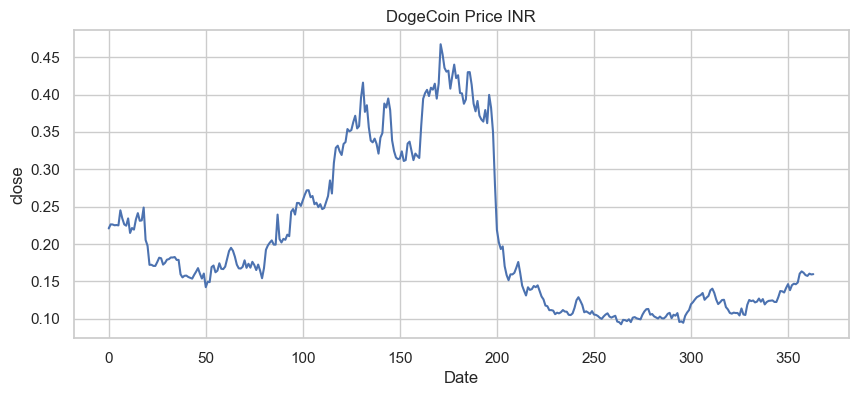

In [24]:

data.dropna()
plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("close")
plt.plot(data["close"])
plt.show()

Now I will be using the autots library in Python to train a machine learning model for predicting the future prices of Dogecoin. If you have never used this library before then you can easily install it in your system by using the pip command:

In [25]:
pip install autots

   ---------------------------------------- 0.0/974.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/974.9 kB ? eta -:--:--
   --------------------- ------------------ 524.3/974.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 974.9/974.9 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Now let’s train the Dogecoin price prediction model and have a look at the future prices of Dogecoin:

In [28]:
# 'timestamp' ya da 'timeOpen' kullanılabilir. Önce sütunları kontrol edelim:
print(data.columns)

# Sütunu datetime formatına çevir (örneğin timeOpen)
data['timeOpen'] = pd.to_datetime(data['timeOpen'])

# AutoTS modelini bu şekilde kur:
from autots import AutoTS

model = AutoTS(
    forecast_length=10,
    frequency='infer',
    ensemble='simple',
    drop_data_older_than_periods=200
)

model = model.fit(
    data,
    date_col='timeOpen',
    value_col='close',
    id_col=None
)

prediction = model.predict()
forecast = prediction.forecast

print("Dogecoin Price Prediction")
print(forecast)


Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')
Using 3 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25

Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3764
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3591 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3495 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3408 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3309 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3214 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3061 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2964 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2877 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2824 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2657 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2592 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2531 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2421 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2315 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 25 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 25 in generation 0: FBProphet
Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Template Eval Error: 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 42 with model Cassandra in generation 0 of 25
Model Number: 43 with model Cassandra in generation 0 of 25
Model Number: 44 with model SectionalMotif in generation 0 of 25
Model Number: 45 with model FBProphet in generation 0 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 45 in generation 0: FBProphet
Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Template Eval Error: ValueError('maximum supported dimension for an ndarray is currently 64, found 190') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 49 in generation 0: BasicLinearModel
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model BasicLinearModel in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 52 i

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

Model Number: 96 with model FBProphet in generation 0 of 25
No anomalies detected.
Template Eval Error: ValueError('Column ds has timezone specified, which is not supported. Remove timezone.') in model 96 in generation 0: FBProphet
Model Number: 97 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 97 in generation 0: ARCH
Model Number: 98 with model DatepartRegression in generation 0 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 98 in generation 0: DatepartRegression
Model Number: 99 with model BasicLinearModel in generation 0 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 99 in generation 0: BasicLinearModel
Model Number: 100 with model FFT in generation 0 of 25
Model Number: 101 with model LastValueNaive in generation 0 of 25
Model Number: 102 with model LastValueNaive in generation 0 of

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 111 with model SeasonalNaive in generation 0 of 25
Model Number: 112 with model SectionalMotif in generation 0 of 25
Model Number: 113 with model LastValueNaive in generation 0 of 25
Model Number: 114 with model GLM in generation 0 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 114 in generation 0: GLM
Model Number: 115 with model MetricMotif in generation 0 of 25
Model Number: 116 with model GLM in generation 0 of 25
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
Template Eval Error: ValueError('Model GLM returned improper forecast_length. Returned: 6 and requested: 10') in model 116 in generation 0: GLM
Model Number: 117 with model FFT in generation 0 of 25
Model Number: 118 with model ConstantNaive in generation 0 of 25
Model Number: 119 with model SeasonalityMotif in generation 0 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in mo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 173 with model ARDL in generation 1 of 25
Model Number: 174 with model UnivariateMotif in generation 1 of 25
Model Number: 175 with model UnivariateMotif in generation 1 of 25
Model Number: 176 with model DatepartRegression in generation 1 of 25
Model Number: 177 with model AverageValueNaive in generation 1 of 25
Model Number: 178 with model ETS in generation 1 of 25
Model Number: 179 with model Cassandra in generation 1 of 25
Model Number: 180 with model GLM in generation 1 of 25
Model Number: 181 with model FFT in generation 1 of 25
Model Number: 182 with model SectionalMotif in generation 1 of 25
Model Number: 183 with model GLS in generation 1 of 25
Model Number: 184 with model RRVAR in generation 1 of 25
Model Number: 185 with model LastValueNaive in generation 1 of 25


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'fixed': True, 'window': 28, 'macro_micro': False, 'center': False}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'simple_binarized'}, 'fillna': 'pchip'}, '3': {'rows': 4, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'lag': 1, 'fill': 'bfill'}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 185 in generation 1: LastVa

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 210 with model GLS in generation 1 of 25
Model Number: 211 with model UnivariateMotif in generation 1 of 25
Model Number: 212 with model AverageValueNaive in generation 1 of 25
Model Number: 213 with model MetricMotif in generation 1 of 25
Model Number: 214 with model FFT in generation 1 of 25
Model Number: 215 with model AverageValueNaive in generation 1 of 25
Model Number: 216 with model GLS in generation 1 of 25
Model Number: 217 with model RRVAR in generation 1 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (50,1) (10,1) ') in model 217 in generation 1: RRVAR
Model Number: 218 with model ARDL in generation 1 of 25
Model Number: 219 with model AverageValueNaive in generation 1 of 25
Model Number: 220 with model Cassandra in generation 1 of 25
Model Number: 221 with model ConstantNaive in generation 1 of 25
Model Number: 222 with model ConstantNaive in generation 1 of 25
Template Eval Error: Exception("Transformer DatepartReg

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 231 with model MetricMotif in generation 1 of 25
Model Number: 232 with model SeasonalityMotif in generation 1 of 25
Model Number: 233 with model ETS in generation 1 of 25
Model Number: 234 with model ETS in generation 1 of 25
Model Number: 235 with model LastValueNaive in generation 1 of 25
Model Number: 236 with model ETS in generation 1 of 25
Model Number: 237 with model DatepartRegression in generation 1 of 25
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1833
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 242 with model SeasonalNaive in generation 1 of 25
Model Number: 243 with model AverageValueNaive in generation 1 of 25
Model Number: 244 with model MetricMotif in generation 1 of 25
Model Number: 245 with model BasicLinearModel in generation 1 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 246 with model FFT in generation 1 of 25
Model Number: 247 with model FFT in generation 1 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on inverse from params ffill {\'0\': {\'numtaps\': 12, \'cutoff_hz\': 0.1, \'window\': [\'kaiser\', 4.0], \'sampling_frequency\': 24, \'on_transform\': False, \'on_inverse\': True, \'bounds_only\': False}, \'1\': {\'fillna\': \'mean\', \'center\': \'zero\'}, \'2\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': {\'fillna\': \'ffill\', \'transformations\': {\'0\': \'IntermittentOccurrence\'}, \'transformation_params\': {\'0\': {\'center\': \'mean\'}}}}} with ValueError("<class \'list\'> as window type is not supported.")') in model 247 in generation 1: FFT
Model Number: 248 with model ConstantNaive in generation 1 of 25
Model Number: 249 with model SeasonalNaive in generation 1 of 25
Model Number: 250 with model ETS in generation 1 of 25
Model Number: 251 with model SeasonalNaive in generation 1

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 264 with model LastValueNaive in generation 2 of 25
Model Number: 265 with model Cassandra in generation 2 of 25
Model Number: 266 with model BasicLinearModel in generation 2 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 266 in generation 2: BasicLinearModel
Model Number: 267 with model BasicLinearModel in generation 2 of 25
Model Number: 268 with model ConstantNaive in generation 2 of 25
Model Number: 269 with model LastValueNaive in generation 2 of 25
Model Number: 270 with model ETS in generation 2 of 25
Model Number: 271 with model ARDL in generation 2 of 25
Model Number: 272 with model UnivariateMotif in generation 2 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 273 with model ARDL in generation 2 of 25
Model Number: 274 with model ETS in generation 2 of 25
Model Number: 275 with model LastValueNaive in generation 2 of 25
Model Number: 276 with model SectionalMotif in generation 2 of 25
Model Number: 277 with model Cassandra in generation 2 of 25
Model Number: 278 with model AverageValueNaive in generation 2 of 25
Model Number: 279 with model BasicLinearModel in generation 2 of 25
Model Number: 280 with model SeasonalityMotif in generation 2 of 25
Model Number: 281 with model GLS in generation 2 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 282 with model SeasonalityMotif in generation 2 of 25
Model Number: 283 with model DatepartRegression in generation 2 of 25
Model Number: 284 with model MetricMotif in generation 2 of 25
Model Number: 285 with model BasicLinearModel in generation 2 of 25
Model Number: 286 with model UnivariateMotif in generation 2 of 25
Model Number: 287 with model ConstantNaive in generation 2 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {'det_order': -1, 'k_ar_diff': 0}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '3': {}, '4': {'rows': 2}, '5': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'fi

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 310 with model Cassandra in generation 2 of 25
Model Number: 311 with model DatepartRegression in generation 2 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 311 in generation 2: DatepartRegression
Model Number: 312 with model GLM in generation 2 of 25
Model Number: 313 with model SectionalMotif in generation 2 of 25
Model Number: 314 with model ARDL in generation 2 of 25
Model Number: 315 with model MetricMotif in generation 2 of 25
Model Number: 316 with model GLS in generation 2 of 25
Model Number: 317 with model SeasonalNaive in generation 2 of 25
Model Number: 318 with model ConstantNaive in generation 2 of 25
Model Number: 319 with model MetricMotif in generation 2 of 25
Model Number: 320 with model SectionalMotif in generation 2 of 25
Model Number: 321 with model Cassandra in generation 2 of 25
Model Number: 322 with model MetricMotif in generation 2 of 25
Model Number: 323 with model LastValueNaive in g

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 328 with model LastValueNaive in generation 2 of 25
Model Number: 329 with model SeasonalityMotif in generation 2 of 25
Model Number: 330 with model ETS in generation 2 of 25
Model Number: 331 with model FFT in generation 2 of 25
Model Number: 332 with model ARDL in generation 2 of 25
Model Number: 333 with model AverageValueNaive in generation 2 of 25
Model Number: 334 with model FFT in generation 2 of 25
Model Number: 335 with model LastValueNaive in generation 2 of 25
Model Number: 336 with model SeasonalNaive in generation 2 of 25
Model Number: 337 with model SectionalMotif in generation 2 of 25
Model Number: 338 with model MetricMotif in generation 2 of 25
Model Number: 339 with model AverageValueNaive in generation 2 of 25
Model Number: 340 with model AverageValueNaive in generation 2 of 25
Model Number: 341 with model GLS in generation 2 of 25
Model Number: 342 with model SeasonalNaive in generation 2 of 25
Model Number: 343 with model SectionalMotif in generation 

C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1431
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0473 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 190 is different from 1455)') in model 373 in generation 3: BasicLinearModel
Model Number: 374 with model ConstantNaive in generation 3 of 25
Model Number: 375 with model SeasonalityMotif in generation 3 of 25
Model Number: 376 with model MetricMotif in generation 3 of 25
Model Number: 377 with model SectionalMotif in generation 3 of 25
Model Number: 378 with model LastValueNaive in generation 3 of 25
Model Number: 379 with model SeasonalNaive in generation 3 of 25
Model Number: 380 with model ARDL in generation 3 of 25
Model Number: 381 with model SeasonalityMotif in generation 3 of 25
Model Number: 382 with model BasicLinearModel in generation 3 of 25
Model Number: 383 with model AverageValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {'regression_model': {'model': '

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

Model Number: 394 with model SeasonalityMotif in generation 3 of 25
Model Number: 395 with model BasicLinearModel in generation 3 of 25
Model Number: 396 with model ETS in generation 3 of 25
Model Number: 397 with model BasicLinearModel in generation 3 of 25
Model Number: 398 with model ARDL in generation 3 of 25
Model Number: 399 with model ARDL in generation 3 of 25
Model Number: 400 with model ConstantNaive in generation 3 of 25
Model Number: 401 with model ConstantNaive in generation 3 of 25
Model Number: 402 with model LastValueNaive in generation 3 of 25
Model Number: 403 with model Cassandra in generation 3 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 404 with model LastValueNaive in generation 3 of 25
Model Number: 405 with model ARDL in generation 3 of 25
Model Number: 406 with model ETS in generation 3 of 25
Model Number: 407 with model MetricMotif in generation 3 of 25
Model Number: 408 with model Cassandra in generation 3 of 25
Template Eval Error: ValueError("ARDL series close failed with error ValueError('The number of regressors (553) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (188).') exog train                             dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  \\\ntimeOpen                                                                        \n2024-11-10 00:00:00+00:00  10.0  1.0  2460624.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-11 00:00:00+00:00  11.0  0.0  2460625.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-12 00:00:00+00:00  12.0  0.0  2460626.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-13 00:00

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 411 with model LastValueNaive in generation 3 of 25
Model Number: 412 with model ConstantNaive in generation 3 of 25
Model Number: 413 with model MetricMotif in generation 3 of 25
Model Number: 414 with model FFT in generation 3 of 25
Model Number: 415 with model Cassandra in generation 3 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 416 with model SectionalMotif in generation 3 of 25
Model Number: 417 with model FFT in generation 3 of 25
Model Number: 418 with model Cassandra in generation 3 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 419 with model ConstantNaive in generation 3 of 25
Model Number: 420 with model ETS in generation 3 of 25
Model Number: 421 with model ARDL in generation 3 of 25
Model Number: 422 with model ConstantNaive in generation 3 of 25
Model Number: 423 with model ETS in generation 3 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, '1': {'lag_1': 2, 'method': 'LastValue'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': ['db2_365.25_12_0.5', 'morlet_7_7_1']}, 'fillna': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 445 with model RRVAR in generation 3 of 25
Model Number: 446 with model SeasonalityMotif in generation 3 of 25
Model Number: 447 with model SeasonalityMotif in generation 3 of 25
Model Number: 448 with model FFT in generation 3 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'numtaps\': 512, \'cutoff_hz\': 0.5, \'window\': [\'exponential\', None, 0.25], \'sampling_frequency\': 168, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'1\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 4, \'deriv\': 0, \'mode\': \'nearest\'}}, \'2\': {}, \'3\': {\'n_harmonics\': \'mid20\', \'detrend\': \'linear\'}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 448 in generation 3: FFT
Model Number: 449 with model ETS in generation 3 of 25
Model Number: 450 with model GLM in generation 3 of 25
Template Eval Error: TypeError('Cannot subtr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 466 with model ARDL in generation 3 of 25
Model Number: 467 with model Cassandra in generation 3 of 25
Model Number: 468 with model FFT in generation 3 of 25
Model Number: 469 with model AverageValueNaive in generation 3 of 25
Model Number: 470 with model BasicLinearModel in generation 3 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 470 in generation 3: BasicLinearModel
Model Number: 471 with model ARDL in generation 3 of 25
Model Number: 472 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("ARDL series close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train                            HolidayFlag_US\ntimeOpen                                 \n2024-11-10 00:00:00+00:00             0.0\n2024-11-11 00:00:00+00:00             0.0\n2024-11-12 00:00:00+00:00             0.0\n2024-11-13 00:00:00+00:00             0.0\n2024-11-14 00:00:00+00:00      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 473 with model SeasonalityMotif in generation 4 of 25
Model Number: 474 with model BasicLinearModel in generation 4 of 25
Template Eval Error: LinAlgError('SVD did not converge') in model 474 in generation 4: BasicLinearModel
Model Number: 475 with model ARDL in generation 4 of 25
Model Number: 476 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 476 in generation 4: ARDL
Model Number: 477 with model BasicLinearModel in generation 4 of 25
Model Number: 478 with model WindowRegression in generation 4 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (30,1) (10,1) ') in model 478 in generation 4: WindowRegression
Model Number: 479 with model SeasonalityMotif in generation 4 of 25
Model Number: 480 with model GLS in generation 4 of 25
Model Number: 481 with model AverageValueNaive in generation 4 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

Model Number: 482 with model RRVAR in generation 4 of 25
Model Number: 483 with model GLM in generation 4 of 25
Model Number: 484 with model GLS in generation 4 of 25
Model Number: 485 with model ConstantNaive in generation 4 of 25
Model Number: 486 with model ConstantNaive in generation 4 of 25
Model Number: 487 with model LastValueNaive in generation 4 of 25
Model Number: 488 with model GLS in generation 4 of 25
Model Number: 489 with model MetricMotif in generation 4 of 25
Model Number: 490 with model SeasonalityMotif in generation 4 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '2': {}, '3': {'regression_model': {'model': 'FastRidg

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 495 with model Cassandra in generation 4 of 25
Model Number: 496 with model GLS in generation 4 of 25
Model Number: 497 with model SectionalMotif in generation 4 of 25
Model Number: 498 with model LastValueNaive in generation 4 of 25
Model Number: 499 with model SeasonalityMotif in generation 4 of 25
Model Number: 500 with model SeasonalNaive in generation 4 of 25
Model Number: 501 with model LastValueNaive in generation 4 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params cubic {'0': {'constraint_method': 'historic_growth', 'constraint_direction': 'lower', 'constraint_regularization': 0.9, 'constraint_value': {'threshold': 1.0, 'quantile': 0.99}, 'bounds_only': False, 'fillna': None}, '1': {'numtaps': 32, 'cutoff_hz': 20, 'window': 'hamming', 'sampling_frequency': 2, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {}, '4': {}, '5': {'lag': 2, 'fill': 'bf

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 510 with model ETS in generation 4 of 25
Model Number: 511 with model RRVAR in generation 4 of 25
Model Number: 512 with model LastValueNaive in generation 4 of 25
Model Number: 513 with model SeasonalityMotif in generation 4 of 25
Model Number: 514 with model LastValueNaive in generation 4 of 25
Model Number: 515 with model MetricMotif in generation 4 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 516 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 516 in generation 4: ARDL
Model Number: 517 with model SeasonalityMotif in generation 4 of 25
Model Number: 518 with model Cassandra in generation 4 of 25
Model Number: 519 with model FFT in generation 4 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'lag': 1, 'fill': 'zero'}, '1': {'lag_1': 60, 'method': 20}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 10}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'pchip'}, '3': {'fixed': True, 'window': 60, 'macro_micro': False, 'center': False}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects')") in model 519 in generation 4: FFT
Model Number: 520 with model GLS in generation 4 of 25
Model Number:

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 526 with model Cassandra in generation 4 of 25
Model Number: 527 with model FFT in generation 4 of 25
Model Number: 528 with model MetricMotif in generation 4 of 25
Model Number: 529 with model ConstantNaive in generation 4 of 25
Model Number: 530 with model Cassandra in generation 4 of 25
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 530 in generation 4: Cassandra
Model Number: 531 with model ARDL in generation 4 of 25
Model Number: 532 with model SeasonalityMotif in generation 4 of 25
Model Number: 533 with model SeasonalNaive in generation 4 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'lag_1': 12, 'method': 'Median'}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': False, 'fillna': 'mean'}, '2': {'constant': 0, 'reintroduction_m

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 535 with model ConstantNaive in generation 4 of 25
Model Number: 536 with model ETS in generation 4 of 25
Model Number: 537 with model ARDL in generation 4 of 25
Model Number: 538 with model ETS in generation 4 of 25
Model Number: 539 with model RRVAR in generation 4 of 25
Model Number: 540 with model SectionalMotif in generation 4 of 25
Model Number: 541 with model SectionalMotif in generation 4 of 25
Model Number: 542 with model FFT in generation 4 of 25
Model Number: 543 with model MetricMotif in generation 4 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 43}, '2': {}, '3': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 576 with model RRVAR in generation 4 of 25
Model Number: 577 with model SeasonalNaive in generation 4 of 25
New Generation: 5 of 25
Model Number: 578 with model SectionalMotif in generation 5 of 25
Model Number: 579 with model ARDL in generation 5 of 25
Model Number: 580 with model Cassandra in generation 5 of 25
Model Number: 581 with model BasicLinearModel in generation 5 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 190 is different from 1455)') in model 581 in generation 5: BasicLinearModel
Model Number: 582 with model Cassandra in generation 5 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encounter

Model Number: 583 with model Cassandra in generation 5 of 25
Model Number: 584 with model ETS in generation 5 of 25
Model Number: 585 with model Cassandra in generation 5 of 25
Model Number: 586 with model SeasonalityMotif in generation 5 of 25
Model Number: 587 with model MetricMotif in generation 5 of 25
Model Number: 588 with model LastValueNaive in generation 5 of 25
Model Number: 589 with model ARDL in generation 5 of 25
Model Number: 590 with model GLS in generation 5 of 25
Model Number: 591 with model ETS in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {}, '1': {'det_order': -1, 'k_ar_diff': 1}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {}, '4': {'lag_1': 1440, 'method': 'LastValue'}} with error ValueError('Coint only works on multivarate series')") in model 591 in generation 5: ETS
Model Number: 592 with mode

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 605 with model ARDL in generation 5 of 25
Model Number: 606 with model SectionalMotif in generation 5 of 25
Model Number: 607 with model LastValueNaive in generation 5 of 25
Model Number: 608 with model ARDL in generation 5 of 25
Model Number: 609 with model RRVAR in generation 5 of 25
Model Number: 610 with model MetricMotif in generation 5 of 25
Model Number: 611 with model LastValueNaive in generation 5 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'mode': 'upscale', 'factor': 4, 'down_method': 'mean', 'fill_method': 'linear'}, '1': {}, '2': {'lag_1': 364, 'method': 'Mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'max'}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 611 in generation 5: LastValueNaive
Model Number: 612 wi

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 626 with model MetricMotif in generation 5 of 25
Model Number: 627 with model ARDL in generation 5 of 25
Model Number: 628 with model SeasonalityMotif in generation 5 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (70,1) (10,1) ') in model 628 in generation 5: SeasonalityMotif
Model Number: 629 with model MetricMotif in generation 5 of 25
Model Number: 630 with model ARDL in generation 5 of 25
Model Number: 631 with model SeasonalityMotif in generation 5 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 631 in generation 5: SeasonalityMotif
Model Number: 632 with model GLS in generation 5 of 25
Model Number: 633 with model WindowRegression in generation 5 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 633 in generation 5: WindowRegression
Model Number: 634 with model MetricMotif in generation 5 of 25
Model Nu

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 640 with model RRVAR in generation 5 of 25
Model Number: 641 with model AverageValueNaive in generation 5 of 25
Model Number: 642 with model SectionalMotif in generation 5 of 25
Model Number: 643 with model MetricMotif in generation 5 of 25
Template Eval Error: Exception('Transformer AlignLastValue failed on fit') in model 643 in generation 5: MetricMotif
Model Number: 644 with model ARDL in generation 5 of 25
Model Number: 645 with model AverageValueNaive in generation 5 of 25
Model Number: 646 with model FFT in generation 5 of 25
Model Number: 647 with model BasicLinearModel in generation 5 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 648 with model ARDL in generation 5 of 25
Model Number: 649 with model ARDL in generation 5 of 25
Model Number: 650 with model Cassandra in generation 5 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 651 with model ETS in generation 5 of 25
Model Number: 652 with model UnivariateMotif in generation 5 of 25
Model Number: 653 with model LastValueNaive in generation 5 of 25
Model Number: 654 with model GLS in generation 5 of 25
Model Number: 655 with model MetricMotif in generation 5 of 25
Model Number: 656 with model MetricMotif in generation 5 of 25
Model Number: 657 with model FFT in generation 5 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'method': 0.2}, '1': {'lag_1': 364, 'method': 5}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {}, '4': {'rows': 4}} with error ValueError('cannot reshape array of size 38 into shape (0,364,newaxis)')") in model 657 in generation 5: FFT
Model Number: 658 with model Cassandra in generation 5 of 25
Model Number: 659 with model MetricMotif in generation 5 of 25
Model Number:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 662 with model AverageValueNaive in generation 6 of 25
Model Number: 663 with model UnivariateMotif in generation 6 of 25
Model Number: 664 with model LastValueNaive in generation 6 of 25
Model Number: 665 with model SectionalMotif in generation 6 of 25
Model Number: 666 with model FFT in generation 6 of 25
Model Number: 667 with model FFT in generation 6 of 25
Model Number: 668 with model SectionalMotif in generation 6 of 25
Model Number: 669 with model MetricMotif in generation 6 of 25
Model Number: 670 with model Cassandra in generation 6 of 25
Model Number: 671 with model SeasonalityMotif in generation 6 of 25
Model Number: 672 with model SeasonalityMotif in generation 6 of 25
Model Number: 673 with model Cassandra in generation 6 of 25
Model Number: 674 with model RRVAR in generation 6 of 25
Model Number: 675 with model BasicLinearModel in generation 6 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'butter', 'm

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 686 with model FFT in generation 6 of 25
Model Number: 687 with model ARDL in generation 6 of 25
Model Number: 688 with model DatepartRegression in generation 6 of 25
Model Number: 689 with model ConstantNaive in generation 6 of 25
Model Number: 690 with model ETS in generation 6 of 25
Model Number: 691 with model LastValueNaive in generation 6 of 25
Model Number: 692 with model MetricMotif in generation 6 of 25
Model Number: 693 with model UnivariateMotif in generation 6 of 25
Model Number: 694 with model SeasonalNaive in generation 6 of 25
Model Number: 695 with model AverageValueNaive in generation 6 of 25
Model Number: 696 with model GLS in generation 6 of 25
Model Number: 697 with model MetricMotif in generation 6 of 25
Model Number: 698 with model SectionalMotif in generation 6 of 25
Model Number: 699 with model ConstantNaive in generation 6 of 25
Model Number: 700 with model ConstantNaive in generation 6 of 25
Model Number: 701 with model BasicLinearModel in genera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 711 with model UnivariateMotif in generation 6 of 25
Model Number: 712 with model ETS in generation 6 of 25
Model Number: 713 with model Cassandra in generation 6 of 25
Model Number: 714 with model ConstantNaive in generation 6 of 25
Model Number: 715 with model LastValueNaive in generation 6 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 716 with model ETS in generation 6 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.05, 'min_child_weight': 2, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 1000, 'grow_policy': 'lossguide'}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}, '2': {'method': 0.9}, '3': {}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 716 in generation 6: ETS
Model Number: 717 with model SeasonalNaive in generation 6 of 25
Model Number: 718 with model FFT in generation 6 of 25
Model Number: 719 with model SeasonalNaive in generation 6 of 25
Model Number: 720 with model LastValueNaive in generation 6 of 25
Model Number: 721 with model Cassandra in generation 6 of 25
Model Number: 722 with mode

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 745 with model GLS in generation 6 of 25
New Generation: 7 of 25
Model Number: 746 with model GLS in generation 7 of 25
Model Number: 747 with model LastValueNaive in generation 7 of 25
Model Number: 748 with model FFT in generation 7 of 25
Model Number: 749 with model DatepartRegression in generation 7 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 749 in generation 7: DatepartRegression
Model Number: 750 with model ARDL in generation 7 of 25
Model Number: 751 with model SeasonalityMotif in generation 7 of 25
Model Number: 752 with model SeasonalityMotif in generation 7 of 25
Model Number: 753 with model ConstantNaive in generation 7 of 25
Model Number: 754 with model UnivariateMotif in generation 7 of 25
Model Number: 755 with model ConstantNaive in generation 7 of 25
Model Number: 756 with model RRVAR in generation 7 of 25
Model Number: 757 with model ARDL in generation 7 of 25
Model Number: 758 with model B

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 771 with model MetricMotif in generation 7 of 25
Model Number: 772 with model MetricMotif in generation 7 of 25
Model Number: 773 with model AverageValueNaive in generation 7 of 25
Model Number: 774 with model LastValueNaive in generation 7 of 25
Model Number: 775 with model Cassandra in generation 7 of 25
Model Number: 776 with model SectionalMotif in generation 7 of 25
Model Number: 777 with model GLS in generation 7 of 25
Model Number: 778 with model ConstantNaive in generation 7 of 25
Model Number: 779 with model ETS in generation 7 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 780 with model FFT in generation 7 of 25
Model Number: 781 with model SectionalMotif in generation 7 of 25
Model Number: 782 with model SeasonalityMotif in generation 7 of 25
Model Number: 783 with model BasicLinearModel in generation 7 of 25
Model Number: 784 with model FFT in generation 7 of 25
Model Number: 785 with model FFT in generation 7 of 25
Model Number: 786 with model RRVAR in generation 7 of 25
Model Number: 787 with model SectionalMotif in generation 7 of 25
Model Number: 788 with model SectionalMotif in generation 7 of 25
Model Number: 789 with model MetricMotif in generation 7 of 25
Model Number: 790 with model SeasonalityMotif in generation 7 of 25
Model Number: 791 with model Cassandra in generation 7 of 25
Model Number: 792 with model LastValueNaive in generation 7 of 25
Model Number: 793 with model FFT in generation 7 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'add

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 826 with model ETS in generation 7 of 25
Template Eval Error: Exception("Transformer ChangepointDetrend failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'model': 'Ridge', 'changepoint_spacing': 90, 'changepoint_distance_end': 60, 'datepart_method': 'common_fourier'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '4': {'decimals': 1, 'on_transform': True, 'on_inverse': True}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects')") in model 826 in generation 7: ETS
Model Number: 827 with model LastValueNaive in generation 7 of 25
Model Number: 828 with model FFT in generation 7 of 25
Model Num

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 836 with model ARDL in generation 8 of 25
Model Number: 837 with model BasicLinearModel in generation 8 of 25
Model Number: 838 with model AverageValueNaive in generation 8 of 25
Model Number: 839 with model BasicLinearModel in generation 8 of 25
Model Number: 840 with model ARDL in generation 8 of 25
Model Number: 841 with model ARDL in generation 8 of 25
Model Number: 842 with model SeasonalityMotif in generation 8 of 25
Model Number: 843 with model Cassandra in generation 8 of 25
Model Number: 844 with model FFT in generation 8 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 845 with model SeasonalityMotif in generation 8 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'simple_binarized'}, 'fillna': 'ffill'}} with error Val

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 904 with model LastValueNaive in generation 8 of 25
Model Number: 905 with model Cassandra in generation 8 of 25
Template Eval Error: ValueError('negative dimensions are not allowed') in model 905 in generation 8: Cassandra
Model Number: 906 with model ARDL in generation 8 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 906 in generation 8: ARDL
Model Number: 907 with model RRVAR in generation 8 of 25
Model Number: 908 with model SeasonalityMotif in generation 8 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 908 in generation 8: SeasonalityMotif
Model Number: 909 with model MetricMotif in generation 8 of 25
Model Number: 910 with model DatepartRegression in generation 8 of 25
Model Number: 911 with model SectionalMotif in generation 8 of 25
Model Number: 912 with model SectionalMotif in generation 8 of 25


C:\ProgramData\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 913 with model AverageValueNaive in generation 8 of 25
New Generation: 9 of 25
Model Number: 914 with model UnivariateMotif in generation 9 of 25
Model Number: 915 with model SeasonalityMotif in generation 9 of 25
Model Number: 916 with model MetricMotif in generation 9 of 25
Model Number: 917 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 917 in generation 9: ARDL
Model Number: 918 with model LastValueNaive in generation 9 of 25
Model Number: 919 with model ETS in generation 9 of 25
Model Number: 920 with model GLS in generation 9 of 25
Model Number: 921 with model SeasonalityMotif in generation 9 of 25
Model Number: 922 with model Cassandra in generation 9 of 25
Model Number: 923 with model FFT in generation 9 of 25
Model Number: 924 with model GLS in generation 9 of 25
Model Number: 925 with model AverageValueNaive in generation 9 of 25
Model Number: 926 with model SeasonalityMo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 930 with model FFT in generation 9 of 25
Model Number: 931 with model Cassandra in generation 9 of 25
Model Number: 932 with model SectionalMotif in generation 9 of 25
Model Number: 933 with model AverageValueNaive in generation 9 of 25
Model Number: 934 with model MetricMotif in generation 9 of 25
Model Number: 935 with model GLS in generation 9 of 25
Model Number: 936 with model AverageValueNaive in generation 9 of 25
Model Number: 937 with model ARDL in generation 9 of 25
Model Number: 938 with model LastValueNaive in generation 9 of 25
Model Number: 939 with model MetricMotif in generation 9 of 25
Model Number: 940 with model RRVAR in generation 9 of 25
Model Number: 941 with model Cassandra in generation 9 of 25
Model Number: 942 with model FFT in generation 9 of 25
Model Number: 943 with model ARDL in generation 9 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 944 with model ETS in generation 9 of 25
Model Number: 945 with model SectionalMotif in generation 9 of 25
Model Number: 946 with model GLS in generation 9 of 25
Model Number: 947 with model SectionalMotif in generation 9 of 25
Model Number: 948 with model SeasonalNaive in generation 9 of 25
Model Number: 949 with model DatepartRegression in generation 9 of 25
Model Number: 950 with model MetricMotif in generation 9 of 25
Model Number: 951 with model ARDL in generation 9 of 25
Model Number: 952 with model MetricMotif in generation 9 of 25
Model Number: 953 with model ConstantNaive in generation 9 of 25
Model Number: 954 with model SeasonalityMotif in generation 9 of 25
Model Number: 955 with model BasicLinearModel in generation 9 of 25
Template Eval Error: LinAlgError('SVD did not converge') in model 955 in generation 9: BasicLinearModel
Model Number: 956 with model ETS in generation 9 of 25
Model Number: 957 with model ETS in generation 9 of 25
Model Number: 958 with mod

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 969 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 969 in generation 9: ARDL
Model Number: 970 with model Cassandra in generation 9 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 971 with model ARDL in generation 9 of 25
Model Number: 972 with model GLS in generation 9 of 25
Model Number: 973 with model RRVAR in generation 9 of 25
Model Number: 974 with model DatepartRegression in generation 9 of 25
Model Number: 975 with model DatepartRegression in generation 9 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params quadratic {'0': {'rolling_window': 360, 'n_tails': 30, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}} with error TypeError('Cannot subtract tz-naive and tz-aware dateti

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 988 with model ConstantNaive in generation 9 of 25
Model Number: 989 with model LastValueNaive in generation 9 of 25
Model Number: 990 with model BasicLinearModel in generation 9 of 25
Model Number: 991 with model AverageValueNaive in generation 9 of 25
Model Number: 992 with model LastValueNaive in generation 9 of 25
Model Number: 993 with model ARDL in generation 9 of 25
Model Number: 994 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '3': {'model_name': 'randomly generated', 'state_transition': [[-0.16565168423401977, 1.040768859225572, 0.12346421539360014, 0.26894730714026605, -0.9581130034621971, -0.14383424555669103, -0.28402270262182333, 0.03740167487069

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 1007 in generation 10: Cassandra
Model Number: 1008 with model ConstantNaive in generation 10 of 25
Model Number: 1009 with model AverageValueNaive in generation 10 of 25
Model Number: 1010 with model ETS in generation 10 of 25
Model Number: 1011 with model AverageValueNaive in generation 10 of 25
Model Number: 1012 with model GLS in generation 10 of 25
Model Number: 1013 with model GLS in generation 10 of 25
Model Number: 1014 with model BasicLinearModel in generation 10 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1014 in generation 10: BasicLinearModel
Model Number: 1015 with model ARDL in generation 10 of 25
Model Number: 1016 with model Cassandra in generation 10 of 25
Model Number: 1017 with model ARDL in generation 10 of 25
Template Eval Error: ValueError("ARDL series close failed with 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1027 with model Cassandra in generation 10 of 25
Model Number: 1028 with model AverageValueNaive in generation 10 of 25
Model Number: 1029 with model SeasonalityMotif in generation 10 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1029 in generation 10: SeasonalityMotif
Model Number: 1030 with model AverageValueNaive in generation 10 of 25
Model Number: 1031 with model SeasonalityMotif in generation 10 of 25
Model Number: 1032 with model ARDL in generation 10 of 25
Model Number: 1033 with model FFT in generation 10 of 25
Model Number: 1034 with model FFT in generation 10 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'model_name': 'holt_winters_damped', 'state_transition': [[1.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.029999999999999992, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:573: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1059 with model Cassandra in generation 10 of 25
Model Number: 1060 with model AverageValueNaive in generation 10 of 25
New Generation: 11 of 25
Model Number: 1061 with model ARDL in generation 11 of 25
Model Number: 1062 with model SectionalMotif in generation 11 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'fillna': 'akima', 'center': 'zero'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'mean'}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'model_name': 'randomly generated_original', 'state_transition': [[1]], 'process_noise': [[0.013]], 'observation_model': [[2]], 'observation_

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1071 with model MetricMotif in generation 11 of 25
Model Number: 1072 with model SectionalMotif in generation 11 of 25
Model Number: 1073 with model AverageValueNaive in generation 11 of 25
Model Number: 1074 with model GLS in generation 11 of 25
Model Number: 1075 with model UnivariateMotif in generation 11 of 25
Model Number: 1076 with model ARDL in generation 11 of 25
Model Number: 1077 with model Cassandra in generation 11 of 25
Model Number: 1078 with model Cassandra in generation 11 of 25
Model Number: 1079 with model Cassandra in generation 11 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1080 with model Cassandra in generation 11 of 25
Model Number: 1081 with model MetricMotif in generation 11 of 25
Model Number: 1082 with model AverageValueNaive in generation 11 of 25
Model Number: 1083 with model SeasonalityMotif in generation 11 of 25
Model Number: 1084 with model FFT in generation 11 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1085 with model ConstantNaive in generation 11 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params pchip {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'fixed': True, 'window': 364, 'macro_micro': False, 'center': True}, '2': {'lag_1': 364, 'method': 20}} with error ValueError('cannot reshape array of size 190 into shape (0,364,newaxis)')") in model 1085 in generation 11: ConstantNaive
Model Number: 1086 with model ETS in generation 11 of 25
Model Number: 1087 with model ARDL in generation 11 of 25
Model Number: 1088 with model MetricMotif in generation 11 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1':

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('operands could not be broadcast together with shapes (10,1) (20,1) ') in model 1106 in generation 11: Cassandra
Model Number: 1107 with model ETS in generation 11 of 25
Model Number: 1108 with model ETS in generation 11 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'span': 12}, '4': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '5': {}} with error ValueError('BTCD only works on multivarate series')") in model 1108 in generation 11: ETS
Model Number: 1109 with model ETS in ge

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1110 with model Cassandra in generation 11 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (10,1) (20,1) ') in model 1110 in generation 11: Cassandra
Model Number: 1111 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1111 in generation 11: ARDL
Model Number: 1112 with model MetricMotif in generation 11 of 25
Model Number: 1113 with model GLS in generation 11 of 25
Model Number: 1114 with model ARDL in generation 11 of 25
Model Number: 1115 with model GLS in generation 11 of 25
Model Number: 1116 with model BasicLinearModel in generation 11 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1117 with model SeasonalityMotif in generation 11 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1117 in generation 11: SeasonalityMotif
Model Number: 1118 with model Cassandra in generation 11 of 25
Model Number: 1119 with model AverageValueNaive in generation 11 of 25
Model Number: 1120 with model SeasonalityMotif in generation 11 of 25
Model Number: 1121 with model SectionalMotif in generation 11 of 25
Model Number: 1122 with model ETS in generation 11 of 25
Model Number: 1123 with model LastValueNaive in generation 11 of 25
New Generation: 12 of 25
Model Number: 1124 with model Cassandra in generation 12 of 25
Model Number: 1125 with model FFT in generation 12 of 25
Model Number: 1126 with model ARDL in generation 12 of 25
Model Number: 1127 with model ARDL in generation 12 of 25
Model Number: 1128 with model GLS in generation 12 of 25
Model Number: 1129 with model SectionalMotif in generation 12 of 25
Mode

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
Model Number: 1140 with model AverageValueNaive in generation 12 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'span': 88}, '1': {}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'det_order': 1, 'k_ar_diff': 1}, '4': {'lag': 1, 'fill': 'zero'}, '5': {}} with error ValueError('Coint only works on multivarate series')") in model 1140 in generation 12: AverageValueNaive
Model Number: 1141 with model ETS in generation 12 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params pchip {'0': {'rows': 4}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}, '3': {'lag_1': 24, 'method': 'Mean'}} with error ValueError('BTCD only works on multivarate series')") in model 1141 in generation 12: ETS
Model Number: 1142 with model BasicLinearModel in generation 12 of 25
Template Eval Error: ValueError('maximum 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1166 with model ETS in generation 12 of 25
Model Number: 1167 with model ConstantNaive in generation 12 of 25
Model Number: 1168 with model FFT in generation 12 of 25
Model Number: 1169 with model ETS in generation 12 of 25
Model Number: 1170 with model MetricMotif in generation 12 of 25
Model Number: 1171 with model AverageValueNaive in generation 12 of 25
Model Number: 1172 with model SectionalMotif in generation 12 of 25
Model Number: 1173 with model SeasonalityMotif in generation 12 of 25
Model Number: 1174 with model ARDL in generation 12 of 25
Model Number: 1175 with model FFT in generation 12 of 25
Model Number: 1176 with model Cassandra in generation 12 of 25
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
Model Number: 1177 with model Cassandra in generation 12 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1178 with model SeasonalityMotif in generation 12 of 25
Model Number: 1179 with model AverageValueNaive in generation 12 of 25
Model Number: 1180 with model ARDL in generation 12 of 25
Model Number: 1181 with model FFT in generation 12 of 25
Model Number: 1182 with model AverageValueNaive in generation 12 of 25
Model Number: 1183 with model MetricMotif in generation 12 of 25
Model Number: 1184 with model SectionalMotif in generation 12 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {}, '1': {}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bylevel': 1, 'reg_alpha': 0.001, 'reg_lambda': 1, 'n_estimators': 100, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}} with error ValueE

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:573: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1195 with model AverageValueNaive in generation 13 of 25
Model Number: 1196 with model LastValueNaive in generation 13 of 25
Model Number: 1197 with model FFT in generation 13 of 25
Model Number: 1198 with model Cassandra in generation 13 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1199 with model MetricMotif in generation 13 of 25
Model Number: 1200 with model AverageValueNaive in generation 13 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {'model_name': 'randomly generated_original', 'state_transition': [[1]], 'process_noise': [[0.013]], 'observation_model': [[2]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}} with error ValueError('Coint only works on multivarate series')") in model 1200 in generation 13: AverageValueNaive
Model Number: 1201 with model FFT in generation 13 of 25
Model Number: 1202 with model SeasonalityMotif in generation 13 of 25
Model Number: 1203 with model SectionalMotif in generation 13 of 25
Template Eval Error: E

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 1240 with model ETS in generation 13 of 25
Model Number: 1241 with model Cassandra in generation 13 of 25
Model Number: 1242 with model SectionalMotif in generation 13 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1243 with model BasicLinearModel in generation 13 of 25
Model Number: 1244 with model ARDL in generation 13 of 25
Model Number: 1245 with model ConstantNaive in generation 13 of 25
Model Number: 1246 with model ARDL in generation 13 of 25
Model Number: 1247 with model GLS in generation 13 of 25
Model Number: 1248 with model GLS in generation 13 of 25
Model Number: 1249 with model ARDL in generation 13 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params pchip {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '1': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1254 with model MetricMotif in generation 14 of 25
Model Number: 1255 with model Cassandra in generation 14 of 25
Model Number: 1256 with model SeasonalityMotif in generation 14 of 25
Model Number: 1257 with model ETS in generation 14 of 25
Model Number: 1258 with model AverageValueNaive in generation 14 of 25
Model Number: 1259 with model BasicLinearModel in generation 14 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1259 in generation 14: BasicLinearModel
Model Number: 1260 with model ARDL in generation 14 of 25
Model Number: 1261 with model LastValueNaive in generation 14 of 25
Model Number: 1262 with model Cassandra in generation 14 of 25
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 1262 in generation 14: Cassandra
Model Number: 1263 with model ConstantNaive in generation 14 of 25
Model Number: 1264 with model Seasonal

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1270 with model ARDL in generation 14 of 25
Model Number: 1271 with model Cassandra in generation 14 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params pchip {\'0\': {\'constraint_method\': \'historic_diff\', \'constraint_direction\': \'lower\', \'constraint_regularization\': 1.0, \'constraint_value\': 0.2, \'bounds_only\': False, \'fillna\': None}, \'1\': {}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.2, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'max\'}, \'3\': {\'regression_model\': {\'model\': \'ElasticNet\', \'model_params\': {}}, \'datepart_method\': \'recurring\', \'polynomial_degree\': None, \'transform_dict\': {\'fillna\': None, \'transformations\': {\'0\': \'ScipyFilter\'}, \'transformation_params\': {\'0\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 3, \'deriv\': 0, \'mode\': \'interp\'}}}}, \'holiday_countries_u

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1285 with model Cassandra in generation 14 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1286 with model Cassandra in generation 14 of 25
Cassandra transformed data is all 0.0! Adding noise...
Model Number: 1287 with model LastValueNaive in generation 14 of 25
Model Number: 1288 with model Cassandra in generation 14 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1289 with model FFT in generation 14 of 25
Model Number: 1290 with model ETS in generation 14 of 25
Model Number: 1291 with model FFT in generation 14 of 25
Model Number: 1292 with model Cassandra in generation 14 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 1292 in generation 14: Cassandra
Model Number: 1293 with model SeasonalityMotif in generation 14 of 25
Model Number: 1294 with model SeasonalityMotif in generation 14 of 25
Model Number: 1295 with model MetricMotif in generation 14 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'method': '3forecastlength'}, '1': {'rows': 28, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 2}, '2': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 14, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': [7, 365.25]}, 'fillna': 'pchip'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objec

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1316 with model LastValueNaive in generation 15 of 25
Model Number: 1317 with model LastValueNaive in generation 15 of 25
Model Number: 1318 with model LastValueNaive in generation 15 of 25
Model Number: 1319 with model BasicLinearModel in generation 15 of 25
Model Number: 1320 with model Cassandra in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1320 in generation 15: Cassandra
Model Number: 1321 with model SeasonalityMotif in generation 15 of 25
Model Number: 1322 with model AverageValueNaive in generation 15 of 25
Model Number: 1323 with model LastValueNaive in generation 15 of 25
Model Number: 1324 with model SeasonalityMotif in generation 15 of 25
Model Number: 1325 with model AverageValueNaive in generation 15 of 25
Model Number: 1326 with model ETS in generation 15 of 25
Model Number: 1327 with model ConstantNaive in generation 15 of 25
Model Number: 1328 with model GLS in generation 15 of 2

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1331 with model AverageValueNaive in generation 15 of 25
Model Number: 1332 with model ETS in generation 15 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'part': 'trend', 'lamb': 1600}, '3': {'det_order': 0, 'k_ar_diff': 0}, '4': {'method': 'clip', 'std_threshold': 2, 'fillna': None}} with error ValueError('Coint only works on multivarate series')") in model 1332 in generation 15: ETS
Model Number: 1333 with model BasicLinearModel in generation 15 of 25
Model Number: 1334 with model SeasonalityMotif in generation 15 of 25
Model Number: 1335 with model AverageValueNaive in generation 15 of 25
Model Number: 1336 with model MetricMotif in gen

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1359 with model MetricMotif in generation 15 of 25
Model Number: 1360 with model ConstantNaive in generation 15 of 25
Model Number: 1361 with model SeasonalityMotif in generation 15 of 25
Model Number: 1362 with model ETS in generation 15 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params cubic {'0': {'constraint_method': 'historic_diff', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.2, 'bounds_only': False, 'fillna': None}, '1': {'method': 100}, '2': {'model_name': 'randomly generated_original', 'state_transition': [[1]], 'process_noise': [[0.013]], 'observation_model': [[2]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '3': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False,

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1384 with model AverageValueNaive in generation 16 of 25
Model Number: 1385 with model AverageValueNaive in generation 16 of 25
Model Number: 1386 with model SeasonalityMotif in generation 16 of 25
Model Number: 1387 with model MetricMotif in generation 16 of 25
Model Number: 1388 with model AverageValueNaive in generation 16 of 25
Model Number: 1389 with model MetricMotif in generation 16 of 25
Model Number: 1390 with model SeasonalityMotif in generation 16 of 25
Model Number: 1391 with model Cassandra in generation 16 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1392 with model ARDL in generation 16 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1392 in generation 16: ARDL
Model Number: 1393 with model FFT in generation 16 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}} with error ValueError('Coint only works on multivarate series')") in model 1393 in generation 16: FFT
Model Number: 1394 with model Cassandra in generation 16 of 25
Model N

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1397 with model Cassandra in generation 16 of 25
Model Number: 1398 with model SeasonalityMotif in generation 16 of 25
Model Number: 1399 with model LastValueNaive in generation 16 of 25
Model Number: 1400 with model ARDL in generation 16 of 25
Model Number: 1401 with model SectionalMotif in generation 16 of 25
Model Number: 1402 with model ETS in generation 16 of 25
Model Number: 1403 with model MetricMotif in generation 16 of 25
Model Number: 1404 with model ConstantNaive in generation 16 of 25
Model Number: 1405 with model ETS in generation 16 of 25
Model Number: 1406 with model UnivariateMotif in generation 16 of 25
Model Number: 1407 with model LastValueNaive in generation 16 of 25
Model Number: 1408 with model GLS in generation 16 of 25
Model Number: 1409 with model SeasonalityMotif in generation 16 of 25
Model Number: 1410 with model BasicLinearModel in generation 16 of 25
Template Eval Error: LinAlgError('SVD did not converge') in model 1410 in generation 16: Basi

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1414 with model ConstantNaive in generation 16 of 25
Model Number: 1415 with model LastValueNaive in generation 16 of 25
Model Number: 1416 with model AverageValueNaive in generation 16 of 25
Model Number: 1417 with model ConstantNaive in generation 16 of 25
Model Number: 1418 with model LastValueNaive in generation 16 of 25
Model Number: 1419 with model SeasonalityMotif in generation 16 of 25
Model Number: 1420 with model Cassandra in generation 16 of 25
Model Number: 1421 with model FFT in generation 16 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1422 with model SeasonalityMotif in generation 16 of 25
Model Number: 1423 with model SeasonalityMotif in generation 16 of 25
Model Number: 1424 with model SeasonalityMotif in generation 16 of 25
Model Number: 1425 with model ARDL in generation 16 of 25
Model Number: 1426 with model ARDL in generation 16 of 25
Model Number: 1427 with model MetricMotif in generation 16 of 25
Model Number: 1428 with model SeasonalityMotif in generation 16 of 25
Model Number: 1429 with model ARDL in generation 16 of 25
Model Number: 1430 with model MetricMotif in generation 16 of 25
Model Number: 1431 with model MetricMotif in generation 16 of 25
Model Number: 1432 with model ARDL in generation 16 of 25
Model Number: 1433 with model AverageValueNaive in generation 16 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params linear {\'0\': {\'method\': \'wiener\', \'method_args\': None}, \'1\': {\'numtaps\': 4, \'cutoff_hz\': 0.1, \'window\': [\'kaiser\', 4.0], \'s

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1437 with model SectionalMotif in generation 16 of 25
Model Number: 1438 with model MetricMotif in generation 16 of 25
New Generation: 17 of 25
Model Number: 1439 with model BasicLinearModel in generation 17 of 25
Model Number: 1440 with model SeasonalityMotif in generation 17 of 25
Model Number: 1441 with model AverageValueNaive in generation 17 of 25
Model Number: 1442 with model LastValueNaive in generation 17 of 25
Model Number: 1443 with model BasicLinearModel in generation 17 of 25
Model Number: 1444 with model LastValueNaive in generation 17 of 25
Model Number: 1445 with model SeasonalityMotif in generation 17 of 25
Model Number: 1446 with model AverageValueNaive in generation 17 of 25
Model Number: 1447 with model RRVAR in generation 17 of 25
Model Number: 1448 with model MetricMotif in generation 17 of 25
Model Number: 1449 with model ConstantNaive in generation 17 of 25
Model Number: 1450 with model LastValueNaive in generation 17 of 25
Model Number: 1451 with m

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1452 with model UnivariateMotif in generation 17 of 25
Model Number: 1453 with model ConstantNaive in generation 17 of 25
Model Number: 1454 with model MetricMotif in generation 17 of 25
Model Number: 1455 with model FFT in generation 17 of 25
Model Number: 1456 with model Cassandra in generation 17 of 25
Model Number: 1457 with model Cassandra in generation 17 of 25
Model Number: 1458 with model BasicLinearModel in generation 17 of 25
Model Number: 1459 with model AverageValueNaive in generation 17 of 25
Model Number: 1460 with model ConstantNaive in generation 17 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (20,1) (10,1) ') in model 1460 in generation 17: ConstantNaive
Model Number: 1461 with model LastValueNaive in generation 17 of 25
Model Number: 1462 with model Cassandra in generation 17 of 25
Model Number: 1463 with model SeasonalityMotif in generation 17 of 25
Model Number: 1464 with model MetricMotif in generation 17

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1471 with model SeasonalityMotif in generation 17 of 25
Model Number: 1472 with model AverageValueNaive in generation 17 of 25
Model Number: 1473 with model SeasonalityMotif in generation 17 of 25
Model Number: 1474 with model BasicLinearModel in generation 17 of 25
Model Number: 1475 with model MetricMotif in generation 17 of 25
Model Number: 1476 with model SeasonalityMotif in generation 17 of 25
Model Number: 1477 with model AverageValueNaive in generation 17 of 25
Model Number: 1478 with model MetricMotif in generation 17 of 25
Model Number: 1479 with model Cassandra in generation 17 of 25
Model Number: 1480 with model ARDL in generation 17 of 25
Model Number: 1481 with model SeasonalityMotif in generation 17 of 25
Model Number: 1482 with model SectionalMotif in generation 17 of 25
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1482 in generation 17: SectionalMotif
Model Number: 1483 with model Cassandra in generation 17 of 25
Model Numbe

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1501 with model MetricMotif in generation 17 of 25
New Generation: 18 of 25
Model Number: 1502 with model Cassandra in generation 18 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1503 with model AverageValueNaive in generation 18 of 25
Model Number: 1504 with model FFT in generation 18 of 25
Model Number: 1505 with model ARDL in generation 18 of 25
Model Number: 1506 with model BasicLinearModel in generation 18 of 25
Model Number: 1507 with model AverageValueNaive in generation 18 of 25
Model Number: 1508 with model ARDL in generation 18 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'span': 28}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'fixed': True, 'window': 87, 'macro_micro': False, 'center': False}} with error ValueError('BTCD only works on multivarate series')") in model 1508 in generation 18: ARDL
Model Number: 1509 with model SectionalMotif in generation 18 of 25
Model Number: 1510 with model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1517 with model MetricMotif in generation 18 of 25
Model Number: 1518 with model MetricMotif in generation 18 of 25
Model Number: 1519 with model Cassandra in generation 18 of 25
Template Eval Error: Exception('Transformer CenterSplit failed on fit from params zero {\'0\': {\'fillna\': \'one\', \'center\': \'median\'}, \'1\': {\'lag\': 1, \'fill\': \'zero\'}, \'2\': {\'constraint_method\': \'slope\', \'constraint_direction\': \'upper\', \'constraint_regularization\': 1.0, \'constraint_value\': {\'slope\': 0.1, \'window\': 30, \'window_agg\': \'max\', \'threshold\': 0.01}, \'bounds_only\': False, \'fillna\': None}} with error ValueError("columns overlap but no suffix specified: Index([\'close_lltmicro\'], dtype=\'object\')")') in model 1519 in generation 18: Cassandra
Model Number: 1520 with model AverageValueNaive in generation 18 of 25
Model Number: 1521 with model ConstantNaive in generation 18 of 25
Model Number: 1522 with model SeasonalityMotif in generation 18 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1527 with model ARDL in generation 18 of 25
Model Number: 1528 with model SeasonalityMotif in generation 18 of 25
Model Number: 1529 with model FFT in generation 18 of 25
Model Number: 1530 with model ConstantNaive in generation 18 of 25
Model Number: 1531 with model ConstantNaive in generation 18 of 25
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
2025-05-19 00:00:00+00:00
Template Eval Error: ValueError('Model ConstantNaive returned improper forecast_length. Returned: 3 and requested: 10') in model 1531 in generation 18: ConstantNaive
Model Number: 1532 with model MetricMotif in generation 18 of 25
Model Number: 1533 with model SeasonalityMotif in generation 18 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1533 in generation 18: SeasonalityMotif
Model Number: 1534 with model LastValueNaive in generation 18 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit f

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1541 with model LastValueNaive in generation 18 of 25
Model Number: 1542 with model AverageValueNaive in generation 18 of 25
Model Number: 1543 with model AverageValueNaive in generation 18 of 25
Model Number: 1544 with model ARDL in generation 18 of 25
Template Eval Error: ValueError("ARDL series close failed with error ValueError('The number of regressors (828) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (188).') exog train                             dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  \\\ntimeOpen                                                                        \n2024-11-10 00:00:00+00:00  10.0  1.0  2460624.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-11 00:00:00+00:00  11.0  0.0  2460625.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-12 00:00:00+00:00  12.0  0.0  2460626.5  0.0  0.0  0.0  0.0  0.0  0.0   \n2024-11-13 00:00:00+00:00  13.0  0.0  2460627.5  

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1549 with model FFT in generation 18 of 25
Model Number: 1550 with model Cassandra in generation 18 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.77767e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1551 with model MetricMotif in generation 18 of 25
Model Number: 1552 with model ARDL in generation 18 of 25
Model Number: 1553 with model ETS in generation 18 of 25
Model Number: 1554 with model SeasonalityMotif in generation 18 of 25
Model Number: 1555 with model UnivariateMotif in generation 18 of 25
Model Number: 1556 with model AverageValueNaive in generation 18 of 25
Model Number: 1557 with model SeasonalityMotif in generation 18 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1558 with model ARDL in generation 18 of 25
Model Number: 1559 with model SectionalMotif in generation 18 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'fillna': 'one', 'center': 'zero'}} with error ValueError('BTCD only works on multivarate series')") in model 1559 in generation 18: SectionalMotif
Model Number: 1560 with model MetricMotif in generation 18 of 25
Model Number: 1561 with model AverageValueNaive in generation 18 of 25
Model Number: 1562 with model Cassandra in generation 18 of 25
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 1562 in generation 18: Cassandra
Model Number: 1563 with model Cassandra in generation 18 of 25
Model Number: 1564 with model ARDL in generation 18 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


New Generation: 19 of 25
Model Number: 1565 with model MetricMotif in generation 19 of 25
Model Number: 1566 with model Cassandra in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1567 with model ARDL in generation 19 of 25
Model Number: 1568 with model AverageValueNaive in generation 19 of 25
Model Number: 1569 with model RRVAR in generation 19 of 25
Model Number: 1570 with model Cassandra in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1571 with model FFT in generation 19 of 25
Model Number: 1572 with model FFT in generation 19 of 25
Model Number: 1573 with model ETS in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1574 with model MetricMotif in generation 19 of 25
Model Number: 1575 with model Cassandra in generation 19 of 25
Model Number: 1576 with model MetricMotif in generation 19 of 25
Model Number: 1577 with model AverageValueNaive in generation 19 of 25
Model Number: 1578 with model GLS in generation 19 of 25
Model Number: 1579 with model SeasonalityMotif in generation 19 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1579 in generation 19: SeasonalityMotif
Model Number: 1580 with model SeasonalityMotif in generation 19 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1580 in generation 19: SeasonalityMotif
Model Number: 1581 with model UnivariateMotif in generation 19 of 25
Model Number: 1582 with model BasicLinearModel in generation 19 of 25
Model Number: 1583 with model ConstantNaive in generation 19 of 25
Model Number: 1584 w

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1585 with model Cassandra in generation 19 of 25
Model Number: 1586 with model GLS in generation 19 of 25
Model Number: 1587 with model AverageValueNaive in generation 19 of 25
Model Number: 1588 with model Cassandra in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1589 with model LastValueNaive in generation 19 of 25
Model Number: 1590 with model Cassandra in generation 19 of 25
Model Number: 1591 with model MetricMotif in generation 19 of 25
Model Number: 1592 with model SeasonalityMotif in generation 19 of 25
Model Number: 1593 with model LastValueNaive in generation 19 of 25
Model Number: 1594 with model FFT in generation 19 of 25
Model Number: 1595 with model Cassandra in generation 19 of 25
Model Number: 1596 with model SeasonalityMotif in generation 19 of 25
Model Number: 1597 with model AverageValueNaive in generation 19 of 25
Model Number: 1598 with model ARDL in generation 19 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1606 with model SeasonalityMotif in generation 19 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1606 in generation 19: SeasonalityMotif
Model Number: 1607 with model Cassandra in generation 19 of 25
Model Number: 1608 with model MetricMotif in generation 19 of 25
Model Number: 1609 with model ConstantNaive in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1610 with model ETS in generation 19 of 25
Model Number: 1611 with model LastValueNaive in generation 19 of 25
Model Number: 1612 with model AverageValueNaive in generation 19 of 25
Model Number: 1613 with model SeasonalityMotif in generation 19 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1613 in generation 19: SeasonalityMotif
Model Number: 1614 with model GLS in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1615 with model ARDL in generation 19 of 25
Model Number: 1616 with model ETS in generation 19 of 25
Model Number: 1617 with model LastValueNaive in generation 19 of 25
Model Number: 1618 with model ETS in generation 19 of 25
Model Number: 1619 with model SeasonalityMotif in generation 19 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 1620 with model ETS in generation 19 of 25
Model Number: 1621 with model SeasonalityMotif in generation 19 of 25
Model Number: 1622 with model BasicLinearModel in generation 19 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1622 in generation 19: BasicLinearModel
Model Number: 1623 with model SeasonalityMotif in generation 19 of 25
Model Number: 1624 with model BasicLinearModel in generation 19 of 25
Model Number: 1625 with model AverageValueNaive in generation 19 of 25
Model Number: 1626 with model AverageValueNaive in generation 19 of 25
Model Number: 1627 with model Cassandra in generation 19 of 25
New Generation: 20 of 25
Model Number: 1628 with model SeasonalityMotif in generation 20 of 25
Model Number: 1629 with model ConstantNaive in generation 20 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params linear {'0': {'numtaps': 256, 'cutoff_hz': 20, 'window': 'hamming', 'sampli

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1641 with model Cassandra in generation 20 of 25
Model Number: 1642 with model SeasonalityMotif in generation 20 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1643 with model SeasonalityMotif in generation 20 of 25
Model Number: 1644 with model ETS in generation 20 of 25
Model Number: 1645 with model BasicLinearModel in generation 20 of 25
Model Number: 1646 with model SeasonalityMotif in generation 20 of 25
Model Number: 1647 with model BasicLinearModel in generation 20 of 25
Model Number: 1648 with model ARDL in generation 20 of 25
Model Number: 1649 with model AverageValueNaive in generation 20 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1650 with model Cassandra in generation 20 of 25
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 1650 in generation 20: Cassandra
Model Number: 1651 with model ETS in generation 20 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params fake_date {'0': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 4, 'min_samples_split': 2, 'max_depth': 5, 'criterion': 'friedman_mse', 'max_features': 1}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': 1}, '1': {'method': 100}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects')") in model 1651 in generation 20: ETS
M

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1655 with model ETS in generation 20 of 25
Model Number: 1656 with model ARDL in generation 20 of 25
Model Number: 1657 with model MetricMotif in generation 20 of 25
Model Number: 1658 with model AverageValueNaive in generation 20 of 25
Model Number: 1659 with model Cassandra in generation 20 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1660 with model MetricMotif in generation 20 of 25
Model Number: 1661 with model MetricMotif in generation 20 of 25
Model Number: 1662 with model ARDL in generation 20 of 25
Model Number: 1663 with model ETS in generation 20 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'common_fourier'}, 'fillna': 'linear'}, '2': {'model_name': 'X1', 'state_transition': [[1, 1, 0], [0, 1, 0], [0, 0, 1]], 'process_noise': [[0.1, 0.0, 0.0], [0.0, 0.01, 0.0], [0.0, 0.0, 0.1]], 'observation_model': [[1, 1, 1]], 'observation_noise': 1.0, 'em_iter': None, 'on_transform': False, 'on_inverse': True}} with error TypeError('Cannot subtract tz-naive

C:\ProgramData\anaconda3\Lib\site-packages\autots\models\basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 1677 with model ConstantNaive in generation 21 of 25
Model Number: 1678 with model MetricMotif in generation 21 of 25
Model Number: 1679 with model ARDL in generation 21 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1679 in generation 21: ARDL
Model Number: 1680 with model Cassandra in generation 21 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1681 with model ARDL in generation 21 of 25
Model Number: 1682 with model BasicLinearModel in generation 21 of 25
Model Number: 1683 with model Cassandra in generation 21 of 25


C:\ProgramData\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1684 with model Cassandra in generation 21 of 25
Model Number: 1685 with model BasicLinearModel in generation 21 of 25
Model Number: 1686 with model SeasonalityMotif in generation 21 of 25
Model Number: 1687 with model SeasonalityMotif in generation 21 of 25
Model Number: 1688 with model Cassandra in generation 21 of 25
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 1688 in generation 21: Cassandra
Model Number: 1689 with model ETS in generation 21 of 25
Model Number: 1690 with model SeasonalityMotif in generation 21 of 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1691 with model BasicLinearModel in generation 21 of 25
Model Number: 1692 with model ARDL in generation 21 of 25
Model Number: 1693 with model MetricMotif in generation 21 of 25
Model Number: 1694 with model ETS in generation 21 of 25
Model Number: 1695 with model AverageValueNaive in generation 21 of 25
Model Number: 1696 with model SeasonalityMotif in generation 21 of 25
Model Number: 1697 with model SeasonalityMotif in generation 21 of 25
Model Number: 1698 with model AverageValueNaive in generation 21 of 25
Model Number: 1699 with model SeasonalityMotif in generation 21 of 25
Model Number: 1700 with model SeasonalityMotif in generation 21 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1700 in generation 21: SeasonalityMotif
Model Number: 1701 with model ARDL in generation 21 of 25
Model Number: 1702 with model AverageValueNaive in generation 21 of 25
Model Number: 1703 with model BasicLinearModel in genera

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1706 with model AverageValueNaive in generation 21 of 25
Model Number: 1707 with model SeasonalityMotif in generation 21 of 25
Model Number: 1708 with model MetricMotif in generation 21 of 25
Model Number: 1709 with model AverageValueNaive in generation 21 of 25
Model Number: 1710 with model BasicLinearModel in generation 21 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1710 in generation 21: BasicLinearModel
Model Number: 1711 with model SeasonalityMotif in generation 21 of 25
New Generation: 22 of 25
Model Number: 1712 with model SeasonalityMotif in generation 22 of 25
Model Number: 1713 with model AverageValueNaive in generation 22 of 25
Model Number: 1714 with model ARDL in generation 22 of 25
Model Number: 1715 with model ARDL in generation 22 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {'lag': 7, 'fill': 'bfill'}, '1': {'method': 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1727 with model AverageValueNaive in generation 22 of 25
Model Number: 1728 with model ARDL in generation 22 of 25
Model Number: 1729 with model MetricMotif in generation 22 of 25
Model Number: 1730 with model AverageValueNaive in generation 22 of 25
Model Number: 1731 with model ETS in generation 22 of 25
Model Number: 1732 with model Cassandra in generation 22 of 25
Model Number: 1733 with model Cassandra in generation 22 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'rows': 28}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'ro

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1735 with model AverageValueNaive in generation 22 of 25
Model Number: 1736 with model SeasonalityMotif in generation 22 of 25
Model Number: 1737 with model ARDL in generation 22 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': [24, 'isoweek_binary', 'days_from_epoch']}, 'fillna': 'linear'}, '1': {'span': 28}, '2': {}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects')") in model 1737 in generation 22: ARDL
Model Number: 1738 with model BasicLinearModel in generation 22 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1738 in generation 22: BasicLinearModel
Model Number: 1739 with mode

C:\ProgramData\anaconda3\Lib\site-packages\autots\models\basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))
C:\ProgramData\anaconda3\Lib\site-packages\autots\models\basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 1746 with model Cassandra in generation 22 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'rows': 28}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}} with error TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects')") in model 1746 in generation 22: Cassandra
Model Number: 1747 with model ConstantNaive in generation 22 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1748 with model ARDL in generation 22 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill_mean_biased {'0': {'theta_values': [0.8, 1.2]}, '1': {'model': 'Linear', 'phi': 1, 'window': 10, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('Input y contains NaN.')") in model 1748 in generation 22: ARDL
Model Number: 1749 with model Cassandra in generation 22 of 25
Template Eval Error: ValueError('seasonality hour creation error') in model 1749 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1751 with model ETS in generation 22 of 25
Model Number: 1752 with model ConstantNaive in generation 22 of 25
Model Number: 1753 with model MetricMotif in generation 22 of 25
New Generation: 23 of 25
Model Number: 1754 with model AverageValueNaive in generation 23 of 25
Model Number: 1755 with model SeasonalityMotif in generation 23 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1755 in generation 23: SeasonalityMotif
Model Number: 1756 with model SeasonalityMotif in generation 23 of 25
Model Number: 1757 with model SeasonalityMotif in generation 23 of 25
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 1757 in generation 23: SeasonalityMotif
Model Number: 1758 with model AverageValueNaive in generation 23 of 25
Model Number: 1759 with model ETS in generation 23 of 25
Model Number: 1760 with model ConstantNaive in generation 23 of 25
Template Eval Error: Exc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1768 with model ARDL in generation 23 of 25
Model Number: 1769 with model AverageValueNaive in generation 23 of 25
Model Number: 1770 with model BasicLinearModel in generation 23 of 25
Model Number: 1771 with model MetricMotif in generation 23 of 25
Model Number: 1772 with model SeasonalityMotif in generation 23 of 25
Model Number: 1773 with model Cassandra in generation 23 of 25
Cassandra transformed data is all 0.0! Adding noise...
Model Number: 1774 with model ARDL in generation 23 of 25
Model Number: 1775 with model AverageValueNaive in generation 23 of 25
Model Number: 1776 with model ConstantNaive in generation 23 of 25
Model Number: 1777 with model ConstantNaive in generation 23 of 25
Model Number: 1778 with model ETS in generation 23 of 25
Model Number: 1779 with model ARDL in generation 23 of 25
Model Number: 1780 with model BasicLinearModel in generation 23 of 25
Model Number: 1781 with model MetricMotif in generation 23 of 25
Model Number: 1782 with model Seaso

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1822 with model ConstantNaive in generation 24 of 25
Model Number: 1823 with model AverageValueNaive in generation 24 of 25
Model Number: 1824 with model Cassandra in generation 24 of 25
Model Number: 1825 with model LastValueNaive in generation 24 of 25
Model Number: 1826 with model SeasonalityMotif in generation 24 of 25


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1827 with model ETS in generation 24 of 25
Model Number: 1828 with model AverageValueNaive in generation 24 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'method': 0.3}, '1': {'whiten': False, 'n_components': None}, '2': {'numtaps': 7, 'cutoff_hz': 100, 'window': 'hamming', 'sampling_frequency': 46, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '3': {'model_name': 'randomly generated_original', 'state_transition': [[1]], 'process_noise': [[0.013]], 'observation_model': [[2]], 'observation_noise': 1.0, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 1828 in generation 24: AverageValueNaive
Model Number: 1829 with model BasicLinearModel in generation 24 of 25
Model Number: 1830 with model MetricMotif in generation 24 of 25
Model Number: 1831 with model Cassandra in generation 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1857 with model Cassandra in generation 25 of 25
Model Number: 1858 with model MetricMotif in generation 25 of 25
Template Eval Error: Exception('Transformer LocalLinearTrend failed on inverse from params ffill {\'0\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': {\'fillna\': None, \'transformations\': {\'0\': \'EWMAFilter\'}, \'transformation_params\': {\'0\': {\'span\': 2}}}}, \'1\': {\'rolling_window\': 0.05, \'n_tails\': 0.05, \'n_future\': 360, \'method\': \'median\', \'macro_micro\': True}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}, \'3\': {\'model_name\': \'randomly generated_original\', \'state_transition\': [[1]], \'process_noise\': [[0.013]], \'observation_model\': [[2]], \'observation_noise\': 1.0, \'em_iter\': 10, \'on_transform\': True, \'on_inverse\': False}, \'4\': {\'rolling_window\': 0.1, \'n_tails\': 0.1, \'n_fut

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1866 with model Cassandra in generation 25 of 25
Model Number: 1867 with model SeasonalityMotif in generation 25 of 25
Template Eval Error: Exception("Transformer BKBandpassFilter failed on inverse from params akima {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'mean'}, '1': {}, '2': {'low': 6, 'high': 32, 'K': 25, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}} with ValueError('Shape of passed values is (42, 1), indices imply (10, 1)')") in model 1867 in generation 25: SeasonalityMotif
Model Number: 1868 with model AverageValueNaive in generation 25 of 25
Model Number: 1869 with model BasicLinearModel in generation 25 of 25
Model Number: 1870 with model ConstantNaive in generation 25 of 25
Model Number: 1871 with model ARDL in generation 25 of 25
Model Number: 1872 with model MetricMotif in generation 25 of 25
Model Number: 1873 with model ETS in g

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.90304e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1875 with model AverageValueNaive in generation 25 of 25
Model Number: 1876 with model SeasonalityMotif in generation 25 of 25
Model Number: 1877 with model LastValueNaive in generation 25 of 25
Model Number: 1878 with model AverageValueNaive in generation 25 of 25
Model Number: 1879 with model LastValueNaive in generation 25 of 25
Ensembling Error: AttributeError("'AutoTS' object has no attribute 'ensemble_templates'"): Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\autots\evaluator\auto_ts.py", line 1455, in fit
    self.ensemble_templates,
    ^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'AutoTS' object has no attribute 'ensemble_templates'

Validation Round: 1
Model Number: 1 of 257 with model SeasonalityMotif for Validation 1
📈 1 - SeasonalityMotif with avg smape 24.2: 
Model Number: 2 of 257 with model SeasonalityMotif for Validation 1
2 - SeasonalityMotif with avg smape 24.2: 
Model Number: 3 of 257 with model SeasonalityMotif for 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.25059e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


44 - Cassandra with avg smape 23.32: 
Model Number: 45 of 257 with model Cassandra for Validation 1
45 - Cassandra with avg smape 23.33: 
Model Number: 46 of 257 with model Cassandra for Validation 1
46 - Cassandra with avg smape 23.33: 
Model Number: 47 of 257 with model ConstantNaive for Validation 1
47 - ConstantNaive with avg smape 20.77: 
Model Number: 48 of 257 with model ConstantNaive for Validation 1
48 - ConstantNaive with avg smape 20.77: 
Model Number: 49 of 257 with model ConstantNaive for Validation 1
49 - ConstantNaive with avg smape 20.77: 
Model Number: 50 of 257 with model ConstantNaive for Validation 1
50 - ConstantNaive with avg smape 20.77: 
Model Number: 51 of 257 with model ConstantNaive for Validation 1
51 - ConstantNaive with avg smape 20.77: 
Model Number: 52 of 257 with model ConstantNaive for Validation 1
52 - ConstantNaive with avg smape 20.77: 
Model Number: 53 of 257 with model ConstantNaive for Validation 1
53 - ConstantNaive with avg smape 20.77: 
Model 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


59 - Cassandra with avg smape 19.85: 
Model Number: 60 of 257 with model Cassandra for Validation 1
60 - Cassandra with avg smape 25.73: 
Model Number: 61 of 257 with model MetricMotif for Validation 1
61 - MetricMotif with avg smape 15.72: 
Model Number: 62 of 257 with model MetricMotif for Validation 1
62 - MetricMotif with avg smape 16.33: 
Model Number: 63 of 257 with model Cassandra for Validation 1
63 - Cassandra with avg smape 24.25: 
Model Number: 64 of 257 with model MetricMotif for Validation 1
64 - MetricMotif with avg smape 17.62: 
Model Number: 65 of 257 with model Cassandra for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.25059e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


65 - Cassandra with avg smape 21.11: 
Model Number: 66 of 257 with model Cassandra for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


66 - Cassandra with avg smape 25.07: 
Model Number: 67 of 257 with model ARDL for Validation 1
67 - ARDL with avg smape 15.93: 
Model Number: 68 of 257 with model ARDL for Validation 1
68 - ARDL with avg smape 15.51: 
Model Number: 69 of 257 with model Cassandra for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


69 - Cassandra with avg smape 22.44: 
Model Number: 70 of 257 with model ARDL for Validation 1
70 - ARDL with avg smape 27.25: 
Model Number: 71 of 257 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 24.92: 
Model Number: 72 of 257 with model ConstantNaive for Validation 1
72 - ConstantNaive with avg smape 24.92: 
Model Number: 73 of 257 with model ConstantNaive for Validation 1
73 - ConstantNaive with avg smape 24.92: 
Model Number: 74 of 257 with model Cassandra for Validation 1
74 - Cassandra with avg smape 24.06: 
Model Number: 75 of 257 with model BasicLinearModel for Validation 1
📈 75 - BasicLinearModel with avg smape 10.75: 
Model Number: 76 of 257 with model MetricMotif for Validation 1
76 - MetricMotif with avg smape 17.73: 
Model Number: 77 of 257 with model MetricMotif for Validation 1
77 - MetricMotif with avg smape 17.73: 
Model Number: 78 of 257 with model ARDL for Validation 1
78 - ARDL with avg smape 12.86: 
Model Number: 79 of 257 with model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


85 - ARDL with avg smape 23.63: 
Model Number: 86 of 257 with model ARDL for Validation 1
86 - ARDL with avg smape 23.63: 
Model Number: 87 of 257 with model MetricMotif for Validation 1
87 - MetricMotif with avg smape 13.91: 
Model Number: 88 of 257 with model MetricMotif for Validation 1
88 - MetricMotif with avg smape 17.08: 
Model Number: 89 of 257 with model MetricMotif for Validation 1
89 - MetricMotif with avg smape 17.62: 
Model Number: 90 of 257 with model MetricMotif for Validation 1
90 - MetricMotif with avg smape 16.21: 
Model Number: 91 of 257 with model MetricMotif for Validation 1
91 - MetricMotif with avg smape 16.21: 
Model Number: 92 of 257 with model BasicLinearModel for Validation 1
92 - BasicLinearModel with avg smape 27.2: 
Model Number: 93 of 257 with model MetricMotif for Validation 1
93 - MetricMotif with avg smape 14.76: 
Model Number: 94 of 257 with model MetricMotif for Validation 1
94 - MetricMotif with avg smape 16.54: 
Model Number: 95 of 257 with model M

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.95963e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


127 - ETS with avg smape 22.5: 
Model Number: 128 of 257 with model FFT for Validation 1
128 - FFT with avg smape 21.62: 
Model Number: 129 of 257 with model FFT for Validation 1
129 - FFT with avg smape 21.62: 
Model Number: 130 of 257 with model ETS for Validation 1
130 - ETS with avg smape 14.36: 
Model Number: 131 of 257 with model ETS for Validation 1
131 - ETS with avg smape 18.13: 
Model Number: 132 of 257 with model FFT for Validation 1
132 - FFT with avg smape 23.23: 
Model Number: 133 of 257 with model BasicLinearModel for Validation 1
133 - BasicLinearModel with avg smape 18.96: 
Model Number: 134 of 257 with model FFT for Validation 1
134 - FFT with avg smape 20.25: 
Model Number: 135 of 257 with model SectionalMotif for Validation 1
135 - SectionalMotif with avg smape 16.2: 
Model Number: 136 of 257 with model SectionalMotif for Validation 1
136 - SectionalMotif with avg smape 16.24: 
Model Number: 137 of 257 with model FFT for Validation 1
137 - FFT with avg smape 17.13: 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


174 - FFT with avg smape 19.19: 
Model Number: 175 of 257 with model FFT for Validation 1
175 - FFT with avg smape 19.19: 
Model Number: 176 of 257 with model SectionalMotif for Validation 1
176 - SectionalMotif with avg smape 21.32: 
Model Number: 177 of 257 with model FFT for Validation 1
177 - FFT with avg smape 41.93: 
Model Number: 178 of 257 with model UnivariateMotif for Validation 1
178 - UnivariateMotif with avg smape 16.5: 
Model Number: 179 of 257 with model RRVAR for Validation 1
179 - RRVAR with avg smape 16.75: 
Model Number: 180 of 257 with model GLS for Validation 1
180 - GLS with avg smape 31.81: 
Model Number: 181 of 257 with model RRVAR for Validation 1
181 - RRVAR with avg smape 15.8: 
Model Number: 182 of 257 with model RRVAR for Validation 1
182 - RRVAR with avg smape 15.8: 
Model Number: 183 of 257 with model RRVAR for Validation 1
183 - RRVAR with avg smape 15.8: 
Model Number: 184 of 257 with model RRVAR for Validation 1
184 - RRVAR with avg smape 15.8: 
Model 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 197 - GLS with avg smape 4.36: 
Model Number: 198 of 257 with model RRVAR for Validation 1
198 - RRVAR with avg smape 14.27: 
Model Number: 199 of 257 with model RRVAR for Validation 1
199 - RRVAR with avg smape 20.39: 
Model Number: 200 of 257 with model GLS for Validation 1
200 - GLS with avg smape 27.33: 
Model Number: 201 of 257 with model GLS for Validation 1
201 - GLS with avg smape 27.3: 
Model Number: 202 of 257 with model GLS for Validation 1
202 - GLS with avg smape 13.03: 
Model Number: 203 of 257 with model SeasonalNaive for Validation 1
203 - SeasonalNaive with avg smape 20.99: 
Model Number: 204 of 257 with model GLM for Validation 1
204 - GLM with avg smape 27.55: 
Model Number: 205 of 257 with model SeasonalNaive for Validation 1
205 - SeasonalNaive with avg smape 14.38: 
Model Number: 206 of 257 with model WindowRegression for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


206 - WindowRegression with avg smape 23.11: 
Model Number: 207 of 257 with model UnivariateMotif for Validation 1
207 - UnivariateMotif with avg smape 5.56: 
Model Number: 208 of 257 with model UnivariateMotif for Validation 1
208 - UnivariateMotif with avg smape 25.04: 
Model Number: 209 of 257 with model GLS for Validation 1
209 - GLS with avg smape 20.77: 
Model Number: 210 of 257 with model WindowRegression for Validation 1
210 - WindowRegression with avg smape 24.43: 
Model Number: 211 of 257 with model DatepartRegression for Validation 1
211 - DatepartRegression with avg smape 25.73: 
Model Number: 212 of 257 with model DatepartRegression for Validation 1
212 - DatepartRegression with avg smape 25.73: 
Model Number: 213 of 257 with model SeasonalNaive for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


213 - SeasonalNaive with avg smape 24.52: 
Model Number: 214 of 257 with model DatepartRegression for Validation 1
214 - DatepartRegression with avg smape 22.73: 
Model Number: 215 of 257 with model WindowRegression for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - WindowRegression with avg smape 25.14: 
Model Number: 216 of 257 with model DatepartRegression for Validation 1
216 - DatepartRegression with avg smape 22.71: 
Model Number: 217 of 257 with model DatepartRegression for Validation 1
217 - DatepartRegression with avg smape 22.71: 
Model Number: 218 of 257 with model DatepartRegression for Validation 1
218 - DatepartRegression with avg smape 20.6: 
Model Number: 219 of 257 with model DatepartRegression for Validation 1
219 - DatepartRegression with avg smape 20.6: 
Model Number: 220 of 257 with model SeasonalNaive for Validation 1
220 - SeasonalNaive with avg smape 14.82: 
Model Number: 221 of 257 with model DatepartRegression for Validation 1
221 - DatepartRegression with avg smape 13.26: 
Model Number: 222 of 257 with model SeasonalNaive for Validation 1
222 - SeasonalNaive with avg smape 30.0: 
Model Number: 223 of 257 with model SeasonalNaive for Validation 1
223 - SeasonalNaive with avg smape 27.85: 
Model Number: 224 of 257 wi

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


241 - GLM with avg smape 11.2: 
Model Number: 242 of 257 with model UnivariateMotif for Validation 1
242 - UnivariateMotif with avg smape 7.25: 
Model Number: 243 of 257 with model DatepartRegression for Validation 1
243 - DatepartRegression with avg smape 28.97: 
Model Number: 244 of 257 with model GLM for Validation 1
244 - GLM with avg smape 11.22: 
Model Number: 245 of 257 with model DatepartRegression for Validation 1
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3292
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3168 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3061 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3005 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2965 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2866 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2862 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2787 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2744 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2699 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2673 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2632 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2520 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2512 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2391 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

248 - GLM with avg smape 21.08: 
Model Number: 249 of 257 with model WindowRegression for Validation 1
249 - WindowRegression with avg smape 32.77: 
Model Number: 250 of 257 with model WindowRegression for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

250 - WindowRegression with avg smape 29.65: 
Model Number: 251 of 257 with model GLM for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


251 - GLM with avg smape 28.92: 
Model Number: 252 of 257 with model WindowRegression for Validation 1
252 - WindowRegression with avg smape 26.15: 
Model Number: 253 of 257 with model GLM for Validation 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


253 - GLM with avg smape 33.36: 
Model Number: 254 of 257 with model DatepartRegression for Validation 1
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1452
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1274
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0470 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0397 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0383 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0323 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


257 - GLM with avg smape 45.74: 
Validation Round: 2
Model Number: 1 of 257 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 4.69: 
Model Number: 2 of 257 with model SeasonalityMotif for Validation 2
2 - SeasonalityMotif with avg smape 4.69: 
Model Number: 3 of 257 with model SeasonalityMotif for Validation 2
📈 3 - SeasonalityMotif with avg smape 4.67: 
Model Number: 4 of 257 with model SeasonalityMotif for Validation 2
📈 4 - SeasonalityMotif with avg smape 4.12: 
Model Number: 5 of 257 with model SeasonalityMotif for Validation 2
5 - SeasonalityMotif with avg smape 8.09: 
Model Number: 6 of 257 with model SeasonalityMotif for Validation 2
📈 6 - SeasonalityMotif with avg smape 4.03: 
Model Number: 7 of 257 with model SeasonalityMotif for Validation 2
7 - SeasonalityMotif with avg smape 4.67: 
Model Number: 8 of 257 with model SeasonalityMotif for Validation 2
8 - SeasonalityMotif with avg smape 4.67: 
Model Number: 9 of 257 with model SeasonalityMotif 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.86168e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


44 - Cassandra with avg smape 10.41: 
Model Number: 45 of 257 with model Cassandra for Validation 2
45 - Cassandra with avg smape 10.41: 
Model Number: 46 of 257 with model Cassandra for Validation 2
46 - Cassandra with avg smape 10.41: 
Model Number: 47 of 257 with model ConstantNaive for Validation 2
47 - ConstantNaive with avg smape 3.86: 
Model Number: 48 of 257 with model ConstantNaive for Validation 2
48 - ConstantNaive with avg smape 3.86: 
Model Number: 49 of 257 with model ConstantNaive for Validation 2
49 - ConstantNaive with avg smape 3.86: 
Model Number: 50 of 257 with model ConstantNaive for Validation 2
50 - ConstantNaive with avg smape 3.86: 
Model Number: 51 of 257 with model ConstantNaive for Validation 2
51 - ConstantNaive with avg smape 3.86: 
Model Number: 52 of 257 with model ConstantNaive for Validation 2
52 - ConstantNaive with avg smape 3.86: 
Model Number: 53 of 257 with model ConstantNaive for Validation 2
53 - ConstantNaive with avg smape 3.86: 
Model Number:

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


59 - Cassandra with avg smape 10.13: 
Model Number: 60 of 257 with model Cassandra for Validation 2
60 - Cassandra with avg smape 5.03: 
Model Number: 61 of 257 with model MetricMotif for Validation 2
61 - MetricMotif with avg smape 4.36: 
Model Number: 62 of 257 with model MetricMotif for Validation 2
62 - MetricMotif with avg smape 5.25: 
Model Number: 63 of 257 with model Cassandra for Validation 2
63 - Cassandra with avg smape 79.04: 
Model Number: 64 of 257 with model MetricMotif for Validation 2
64 - MetricMotif with avg smape 4.62: 
Model Number: 65 of 257 with model Cassandra for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.86168e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


65 - Cassandra with avg smape 8.36: 
Model Number: 66 of 257 with model Cassandra for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


66 - Cassandra with avg smape 3.54: 
Model Number: 67 of 257 with model ARDL for Validation 2
67 - ARDL with avg smape 4.22: 
Model Number: 68 of 257 with model ARDL for Validation 2
68 - ARDL with avg smape 4.55: 
Model Number: 69 of 257 with model Cassandra for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


69 - Cassandra with avg smape 22.39: 
Model Number: 70 of 257 with model ARDL for Validation 2
70 - ARDL with avg smape 6.02: 
Model Number: 71 of 257 with model ConstantNaive for Validation 2
71 - ConstantNaive with avg smape 4.08: 
Model Number: 72 of 257 with model ConstantNaive for Validation 2
72 - ConstantNaive with avg smape 4.08: 
Model Number: 73 of 257 with model ConstantNaive for Validation 2
73 - ConstantNaive with avg smape 4.08: 
Model Number: 74 of 257 with model Cassandra for Validation 2
74 - Cassandra with avg smape 10.18: 
Model Number: 75 of 257 with model BasicLinearModel for Validation 2
75 - BasicLinearModel with avg smape 42.31: 
Model Number: 76 of 257 with model MetricMotif for Validation 2
76 - MetricMotif with avg smape 3.92: 
Model Number: 77 of 257 with model MetricMotif for Validation 2
77 - MetricMotif with avg smape 3.92: 
Model Number: 78 of 257 with model ARDL for Validation 2
78 - ARDL with avg smape 3.71: 
Model Number: 79 of 257 with model MetricMo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


86 - ARDL with avg smape 3.13: 
Model Number: 87 of 257 with model MetricMotif for Validation 2
87 - MetricMotif with avg smape 4.04: 
Model Number: 88 of 257 with model MetricMotif for Validation 2
88 - MetricMotif with avg smape 4.12: 
Model Number: 89 of 257 with model MetricMotif for Validation 2
89 - MetricMotif with avg smape 4.49: 
Model Number: 90 of 257 with model MetricMotif for Validation 2
90 - MetricMotif with avg smape 4.12: 
Model Number: 91 of 257 with model MetricMotif for Validation 2
91 - MetricMotif with avg smape 4.12: 
Model Number: 92 of 257 with model BasicLinearModel for Validation 2
92 - BasicLinearModel with avg smape 14.96: 
Model Number: 93 of 257 with model MetricMotif for Validation 2
93 - MetricMotif with avg smape 4.1: 
Model Number: 94 of 257 with model MetricMotif for Validation 2
94 - MetricMotif with avg smape 4.44: 
Model Number: 95 of 257 with model MetricMotif for Validation 2
95 - MetricMotif with avg smape 5.82: 
Model Number: 96 of 257 with mo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.12062e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


127 - ETS with avg smape 3.71: 
Model Number: 128 of 257 with model FFT for Validation 2
128 - FFT with avg smape 4.46: 
Model Number: 129 of 257 with model FFT for Validation 2
129 - FFT with avg smape 4.46: 
Model Number: 130 of 257 with model ETS for Validation 2
130 - ETS with avg smape 4.41: 
Model Number: 131 of 257 with model ETS for Validation 2
131 - ETS with avg smape 3.8: 
Model Number: 132 of 257 with model FFT for Validation 2
132 - FFT with avg smape 3.79: 
Model Number: 133 of 257 with model BasicLinearModel for Validation 2
133 - BasicLinearModel with avg smape 27.65: 
Model Number: 134 of 257 with model FFT for Validation 2
134 - FFT with avg smape 9.99: 
Model Number: 135 of 257 with model SectionalMotif for Validation 2
135 - SectionalMotif with avg smape 14.18: 
Model Number: 136 of 257 with model SectionalMotif for Validation 2
136 - SectionalMotif with avg smape 14.43: 
Model Number: 137 of 257 with model FFT for Validation 2
137 - FFT with avg smape 10.32: 
Model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


174 - FFT with avg smape 5.2: 
Model Number: 175 of 257 with model FFT for Validation 2
175 - FFT with avg smape 5.2: 
Model Number: 176 of 257 with model SectionalMotif for Validation 2
176 - SectionalMotif with avg smape 12.45: 
Model Number: 177 of 257 with model FFT for Validation 2
177 - FFT with avg smape 10.04: 
Model Number: 178 of 257 with model UnivariateMotif for Validation 2
178 - UnivariateMotif with avg smape 4.22: 
Model Number: 179 of 257 with model RRVAR for Validation 2
179 - RRVAR with avg smape 3.36: 
Model Number: 180 of 257 with model GLS for Validation 2
180 - GLS with avg smape 10.59: 
Model Number: 181 of 257 with model RRVAR for Validation 2
181 - RRVAR with avg smape 3.45: 
Model Number: 182 of 257 with model RRVAR for Validation 2
182 - RRVAR with avg smape 3.45: 
Model Number: 183 of 257 with model RRVAR for Validation 2
183 - RRVAR with avg smape 3.45: 
Model Number: 184 of 257 with model RRVAR for Validation 2
184 - RRVAR with avg smape 3.45: 
Model Numbe

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


206 - WindowRegression with avg smape 7.44: 
Model Number: 207 of 257 with model UnivariateMotif for Validation 2
207 - UnivariateMotif with avg smape 10.8: 
Model Number: 208 of 257 with model UnivariateMotif for Validation 2
208 - UnivariateMotif with avg smape 4.45: 
Model Number: 209 of 257 with model GLS for Validation 2
209 - GLS with avg smape 3.86: 
Model Number: 210 of 257 with model WindowRegression for Validation 2
210 - WindowRegression with avg smape 5.56: 
Model Number: 211 of 257 with model DatepartRegression for Validation 2
211 - DatepartRegression with avg smape 9.91: 
Model Number: 212 of 257 with model DatepartRegression for Validation 2
212 - DatepartRegression with avg smape 11.7: 
Model Number: 213 of 257 with model SeasonalNaive for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


213 - SeasonalNaive with avg smape 3.63: 
Model Number: 214 of 257 with model DatepartRegression for Validation 2
214 - DatepartRegression with avg smape 8.41: 
Model Number: 215 of 257 with model WindowRegression for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - WindowRegression with avg smape 3.79: 
Model Number: 216 of 257 with model DatepartRegression for Validation 2
216 - DatepartRegression with avg smape 8.34: 
Model Number: 217 of 257 with model DatepartRegression for Validation 2
217 - DatepartRegression with avg smape 8.34: 
Model Number: 218 of 257 with model DatepartRegression for Validation 2
218 - DatepartRegression with avg smape 8.89: 
Model Number: 219 of 257 with model DatepartRegression for Validation 2
219 - DatepartRegression with avg smape 8.89: 
Model Number: 220 of 257 with model SeasonalNaive for Validation 2
220 - SeasonalNaive with avg smape 7.95: 
Model Number: 221 of 257 with model DatepartRegression for Validation 2
221 - DatepartRegression with avg smape 5.53: 
Model Number: 222 of 257 with model SeasonalNaive for Validation 2
222 - SeasonalNaive with avg smape 10.08: 
Model Number: 223 of 257 with model SeasonalNaive for Validation 2
223 - SeasonalNaive with avg smape 8.08: 
Model Number: 224 of 257 with mo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


241 - GLM with avg smape 36.78: 
Model Number: 242 of 257 with model UnivariateMotif for Validation 2
242 - UnivariateMotif with avg smape 14.35: 
Model Number: 243 of 257 with model DatepartRegression for Validation 2
243 - DatepartRegression with avg smape 4.36: 
Model Number: 244 of 257 with model GLM for Validation 2
244 - GLM with avg smape 36.78: 
Model Number: 245 of 257 with model DatepartRegression for Validation 2
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3608
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3394 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3406 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3290 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3247 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3070 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3088 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2967 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2882 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2850 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2814 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2803 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2803 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2736 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2726 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

248 - GLM with avg smape 3.89: 
Model Number: 249 of 257 with model WindowRegression for Validation 2
249 - WindowRegression with avg smape 6.93: 
Model Number: 250 of 257 with model WindowRegression for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

250 - WindowRegression with avg smape 13.43: 
Model Number: 251 of 257 with model GLM for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


251 - GLM with avg smape 46.08: 
Model Number: 252 of 257 with model WindowRegression for Validation 2
252 - WindowRegression with avg smape 12.33: 
Model Number: 253 of 257 with model GLM for Validation 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


253 - GLM with avg smape 28.07: 
Model Number: 254 of 257 with model DatepartRegression for Validation 2
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1299
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0487 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0356 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0293 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0322 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1223
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0557 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0488 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0535 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0339 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0324 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0320 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0265 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0244 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


257 - GLM with avg smape 68.94: 
Validation Round: 3
Model Number: 1 of 257 with model SeasonalityMotif for Validation 3
📈 1 - SeasonalityMotif with avg smape 10.27: 
Model Number: 2 of 257 with model SeasonalityMotif for Validation 3
2 - SeasonalityMotif with avg smape 10.27: 
Model Number: 3 of 257 with model SeasonalityMotif for Validation 3
3 - SeasonalityMotif with avg smape 10.32: 
Model Number: 4 of 257 with model SeasonalityMotif for Validation 3
4 - SeasonalityMotif with avg smape 10.32: 
Model Number: 5 of 257 with model SeasonalityMotif for Validation 3
5 - SeasonalityMotif with avg smape 10.32: 
Model Number: 6 of 257 with model SeasonalityMotif for Validation 3
6 - SeasonalityMotif with avg smape 10.32: 
Model Number: 7 of 257 with model SeasonalityMotif for Validation 3
7 - SeasonalityMotif with avg smape 10.32: 
Model Number: 8 of 257 with model SeasonalityMotif for Validation 3
8 - SeasonalityMotif with avg smape 10.32: 
Model Number: 9 of 257 with model SeasonalityMoti

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.35967e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


44 - Cassandra with avg smape 12.17: 
Model Number: 45 of 257 with model Cassandra for Validation 3
45 - Cassandra with avg smape 12.17: 
Model Number: 46 of 257 with model Cassandra for Validation 3
46 - Cassandra with avg smape 12.17: 
Model Number: 47 of 257 with model ConstantNaive for Validation 3
47 - ConstantNaive with avg smape 10.12: 
Model Number: 48 of 257 with model ConstantNaive for Validation 3
48 - ConstantNaive with avg smape 10.12: 
Model Number: 49 of 257 with model ConstantNaive for Validation 3
49 - ConstantNaive with avg smape 10.12: 
Model Number: 50 of 257 with model ConstantNaive for Validation 3
50 - ConstantNaive with avg smape 10.12: 
Model Number: 51 of 257 with model ConstantNaive for Validation 3
51 - ConstantNaive with avg smape 10.12: 
Model Number: 52 of 257 with model ConstantNaive for Validation 3
52 - ConstantNaive with avg smape 10.12: 
Model Number: 53 of 257 with model ConstantNaive for Validation 3
53 - ConstantNaive with avg smape 10.12: 
Model 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


59 - Cassandra with avg smape 15.18: 
Model Number: 60 of 257 with model Cassandra for Validation 3
60 - Cassandra with avg smape 10.32: 
Model Number: 61 of 257 with model MetricMotif for Validation 3
61 - MetricMotif with avg smape 10.92: 
Model Number: 62 of 257 with model MetricMotif for Validation 3
62 - MetricMotif with avg smape 16.9: 
Model Number: 63 of 257 with model Cassandra for Validation 3
63 - Cassandra with avg smape 12.5: 
Model Number: 64 of 257 with model MetricMotif for Validation 3
📈 64 - MetricMotif with avg smape 9.03: 
Model Number: 65 of 257 with model Cassandra for Validation 3
65 - Cassandra with avg smape 11.56: 
Model Number: 66 of 257 with model Cassandra for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.35967e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


66 - Cassandra with avg smape 14.93: 
Model Number: 67 of 257 with model ARDL for Validation 3
📈 67 - ARDL with avg smape 8.88: 
Model Number: 68 of 257 with model ARDL for Validation 3
📈 68 - ARDL with avg smape 6.25: 
Model Number: 69 of 257 with model Cassandra for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


69 - Cassandra with avg smape 11.71: 
Model Number: 70 of 257 with model ARDL for Validation 3
70 - ARDL with avg smape 13.12: 
Model Number: 71 of 257 with model ConstantNaive for Validation 3
71 - ConstantNaive with avg smape 9.29: 
Model Number: 72 of 257 with model ConstantNaive for Validation 3
72 - ConstantNaive with avg smape 9.29: 
Model Number: 73 of 257 with model ConstantNaive for Validation 3
73 - ConstantNaive with avg smape 9.29: 
Model Number: 74 of 257 with model Cassandra for Validation 3
74 - Cassandra with avg smape 12.71: 
Model Number: 75 of 257 with model BasicLinearModel for Validation 3
75 - BasicLinearModel with avg smape 58.03: 
Model Number: 76 of 257 with model MetricMotif for Validation 3
76 - MetricMotif with avg smape 11.41: 
Model Number: 77 of 257 with model MetricMotif for Validation 3
77 - MetricMotif with avg smape 11.41: 
Model Number: 78 of 257 with model ARDL for Validation 3
78 - ARDL with avg smape 9.23: 
Model Number: 79 of 257 with model Metri

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


87 - MetricMotif with avg smape 8.52: 
Model Number: 88 of 257 with model MetricMotif for Validation 3
88 - MetricMotif with avg smape 10.27: 
Model Number: 89 of 257 with model MetricMotif for Validation 3
89 - MetricMotif with avg smape 9.03: 
Model Number: 90 of 257 with model MetricMotif for Validation 3
90 - MetricMotif with avg smape 10.25: 
Model Number: 91 of 257 with model MetricMotif for Validation 3
91 - MetricMotif with avg smape 10.25: 
Model Number: 92 of 257 with model BasicLinearModel for Validation 3
92 - BasicLinearModel with avg smape 13.6: 
Model Number: 93 of 257 with model MetricMotif for Validation 3
93 - MetricMotif with avg smape 8.54: 
Model Number: 94 of 257 with model MetricMotif for Validation 3
94 - MetricMotif with avg smape 10.91: 
Model Number: 95 of 257 with model MetricMotif for Validation 3
95 - MetricMotif with avg smape 8.71: 
Model Number: 96 of 257 with model BasicLinearModel for Validation 3
96 - BasicLinearModel with avg smape 13.7: 
Model Numb

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.11004e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


127 - ETS with avg smape 7.01: 
Model Number: 128 of 257 with model FFT for Validation 3
128 - FFT with avg smape 13.2: 
Model Number: 129 of 257 with model FFT for Validation 3
129 - FFT with avg smape 13.2: 
Model Number: 130 of 257 with model ETS for Validation 3
130 - ETS with avg smape 12.95: 
Model Number: 131 of 257 with model ETS for Validation 3
131 - ETS with avg smape 9.88: 
Model Number: 132 of 257 with model FFT for Validation 3
132 - FFT with avg smape 12.38: 
Model Number: 133 of 257 with model BasicLinearModel for Validation 3
133 - BasicLinearModel with avg smape 20.06: 
Model Number: 134 of 257 with model FFT for Validation 3
134 - FFT with avg smape 9.01: 
Model Number: 135 of 257 with model SectionalMotif for Validation 3
135 - SectionalMotif with avg smape 31.11: 
Model Number: 136 of 257 with model SectionalMotif for Validation 3
136 - SectionalMotif with avg smape 30.91: 
Model Number: 137 of 257 with model FFT for Validation 3
📈 137 - FFT with avg smape 5.71: 
M

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


174 - FFT with avg smape 12.83: 
Model Number: 175 of 257 with model FFT for Validation 3
175 - FFT with avg smape 12.84: 
Model Number: 176 of 257 with model SectionalMotif for Validation 3
176 - SectionalMotif with avg smape 11.24: 
Model Number: 177 of 257 with model FFT for Validation 3
177 - FFT with avg smape 11.67: 
Model Number: 178 of 257 with model UnivariateMotif for Validation 3
178 - UnivariateMotif with avg smape 9.14: 
Model Number: 179 of 257 with model RRVAR for Validation 3
179 - RRVAR with avg smape 11.21: 
Model Number: 180 of 257 with model GLS for Validation 3
180 - GLS with avg smape 26.92: 
Model Number: 181 of 257 with model RRVAR for Validation 3
181 - RRVAR with avg smape 9.89: 
Model Number: 182 of 257 with model RRVAR for Validation 3
182 - RRVAR with avg smape 9.89: 
Model Number: 183 of 257 with model RRVAR for Validation 3
183 - RRVAR with avg smape 9.89: 
Model Number: 184 of 257 with model RRVAR for Validation 3
184 - RRVAR with avg smape 9.89: 
Model 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


206 - WindowRegression with avg smape 7.6: 
Model Number: 207 of 257 with model UnivariateMotif for Validation 3
📈 207 - UnivariateMotif with avg smape 5.27: 
Model Number: 208 of 257 with model UnivariateMotif for Validation 3
208 - UnivariateMotif with avg smape 7.15: 
Model Number: 209 of 257 with model GLS for Validation 3
209 - GLS with avg smape 10.12: 
Model Number: 210 of 257 with model WindowRegression for Validation 3
📈 210 - WindowRegression with avg smape 5.17: 
Model Number: 211 of 257 with model DatepartRegression for Validation 3
211 - DatepartRegression with avg smape 8.02: 
Model Number: 212 of 257 with model DatepartRegression for Validation 3
212 - DatepartRegression with avg smape 24.13: 
Model Number: 213 of 257 with model SeasonalNaive for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


213 - SeasonalNaive with avg smape 10.12: 
Model Number: 214 of 257 with model DatepartRegression for Validation 3
214 - DatepartRegression with avg smape 10.23: 
Model Number: 215 of 257 with model WindowRegression for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - WindowRegression with avg smape 7.09: 
Model Number: 216 of 257 with model DatepartRegression for Validation 3
216 - DatepartRegression with avg smape 10.28: 
Model Number: 217 of 257 with model DatepartRegression for Validation 3
217 - DatepartRegression with avg smape 10.28: 
Model Number: 218 of 257 with model DatepartRegression for Validation 3
218 - DatepartRegression with avg smape 10.21: 
Model Number: 219 of 257 with model DatepartRegression for Validation 3
219 - DatepartRegression with avg smape 10.21: 
Model Number: 220 of 257 with model SeasonalNaive for Validation 3
220 - SeasonalNaive with avg smape 13.57: 
Model Number: 221 of 257 with model DatepartRegression for Validation 3
221 - DatepartRegression with avg smape 7.9: 
Model Number: 222 of 257 with model SeasonalNaive for Validation 3
222 - SeasonalNaive with avg smape 10.04: 
Model Number: 223 of 257 with model SeasonalNaive for Validation 3
223 - SeasonalNaive with avg smape 10.29: 
Model Number: 224 of 257 wi

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


241 - GLM with avg smape 38.76: 
Model Number: 242 of 257 with model UnivariateMotif for Validation 3
242 - UnivariateMotif with avg smape 5.57: 
Model Number: 243 of 257 with model DatepartRegression for Validation 3
243 - DatepartRegression with avg smape 11.66: 
Model Number: 244 of 257 with model GLM for Validation 3
244 - GLM with avg smape 38.54: 
Model Number: 245 of 257 with model DatepartRegression for Validation 3
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3496
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3528 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3318 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3223 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3166 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3059 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2917 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2853 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2801 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2820 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2755
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2691 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2575 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2655 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2644 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

248 - GLM with avg smape 10.87: 
Model Number: 249 of 257 with model WindowRegression for Validation 3
249 - WindowRegression with avg smape 13.59: 
Model Number: 250 of 257 with model WindowRegression for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feat

250 - WindowRegression with avg smape 17.66: 
Model Number: 251 of 257 with model GLM for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


251 - GLM with avg smape 10.22: 
Model Number: 252 of 257 with model WindowRegression for Validation 3
252 - WindowRegression with avg smape 17.04: 
Model Number: 253 of 257 with model GLM for Validation 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


253 - GLM with avg smape 18.74: 
Model Number: 254 of 257 with model DatepartRegression for Validation 3
Epoch 1/50


C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1737
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1129 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\Users\LGR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2120
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1247 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


257 - GLM with avg smape 70.75: 
Model Number: 2651 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2656 in generation 27: Ensemble
Model Number: 2657 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2662 in generation 27: Ensemble
Model Number: 2663 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1,

C:\ProgramData\anaconda3\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
C:\ProgramData\anaconda3\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Dogecoin Price Prediction
                              close
2025-05-29 00:00:00+00:00  0.220782
2025-05-30 00:00:00+00:00  0.221782
2025-05-31 00:00:00+00:00  0.222407
2025-06-01 00:00:00+00:00  0.218063
2025-06-02 00:00:00+00:00  0.215491
2025-06-03 00:00:00+00:00  0.214939
2025-06-04 00:00:00+00:00  0.215109
2025-06-05 00:00:00+00:00  0.215124
2025-06-06 00:00:00+00:00  0.214045
2025-06-07 00:00:00+00:00  0.211540


Yazar, USD/INR (ABD Doları / Hindistan Rupisi) paritesinin geçmiş verilerini kullanarak bir Decision Tree Regression (Karar Ağacı Regresyonu) modeliyle tahmin gerçekleştirmiştir ref

Veri Toplama: Yahoo Finance üzerinden USD/INR paritesinin geçmiş verileri CSV formatında indirilmiştir.

Veri Hazırlama: Veri çerçevesi oluşturulmuş ve "Close" sütunu hedef değişken olarak belirlenmiştir.

Özellik Seçimi: "Open", "High", "Low" gibi sütunlar giriş değişkenleri (X) olarak kullanılmıştır.

Model Eğitimi: Veri eğitim ve test setlerine bölünerek, Decision Tree Regression modeli eğitilmiştir.

Tahmin ve Değerlendirme: Model, test verileri üzerinde döviz kuru tahminleri yapmış ve sonuçlar değerlendirilmiştir.

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# CSV oku
df = pd.read_csv("dogecoin_historical.csv", delimiter=";")

# Gerekli sütunlar
df_model = df[['open', 'high', 'low', 'volume', 'marketCap', 'close']].dropna()
X = df_model[['open', 'high', 'low', 'volume', 'marketCap']]
y = df_model['close']

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

# Model eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Kaydet
joblib.dump(model, "dogecoin_price_model.pkl")


['dogecoin_price_model.pkl']